# [IT Academy - Data Science with Python](https://www.barcelonactiva.cat/es/itacademy)
## S15 T01: Unsupervised Classification
### [Github Unsupervised Classification](https://github.com/jesussantana/Unsupervised-Classification)
[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

## Auto Import Python Libraries

https://pypi.org/project/pyforest/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
import sys
# ^^^ pyforest auto-imports - don't write above this line
#%pip install --upgrade pyforest
#!python -m pyforest install_extensions

In [2]:
# Import Dependencies
# ==============================================================================

from pyforest import *

In [3]:
# Check imported dependencies
lazy_imports()

['from sklearn import svm',
 'import numpy as np',
 'from pathlib import Path',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.cluster import KMeans',
 'import awswrangler as wr',
 'import fbprophet',
 'from sklearn.linear_model import ElasticNet',
 'import matplotlib as mpl',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from pyspark import SparkContext',
 'from dask import dataframe as dd',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.decomposition import PCA',
 'from sklearn import metrics',
 'import os',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.ensemble import RandomForestClassifier',
 'import plotly.express as px',
 'from scipy import stats',
 'import pandas as pd',
 'import seaborn as sns',
 'from scipy import signal as sg',
 'from sklearn.linear_model import Lasso',
 'import tensorflow as tf',
 'from sklearn.preprocessing import StandardScaler',
 'import sys',
 'from fbprophet import Prophet',
 'import mat

In [4]:
# Data wrangling
# ==============================================================================
import missingno as msno 

# Cliustering
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering

# Metrics
# ==============================================================================
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Others Plots
# ==============================================================================
from yellowbrick.cluster import SilhouetteVisualizer

# Matplotlib configuration
# ==============================================================================
import matplotlib.ticker as ticker
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Classify the different flights

### Exercise 1: 
  - Classify the different flights using the K-means algorithm.


### Exercise 2: 
  - Classify the different flights using the hierarchical clustering algorithm.


### Exercise 3: 
  - Calculate clustering performance using a parameter such as silhouette.

In [5]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

<IPython.core.display.Javascript object>

In [6]:
df = df_raw.copy()

## Exploratory analysis

In [7]:
df.head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0   2211.0        2225            WN        335  N712SW              128.0   
1   1002.0        1000            WN       3231  N772SW              128.0   
2    804.0         750            WN        448  N428WN               96.0   
3   1959.0        1925            WN       3920  N464WN               90.0   
4   2121.0        2110            WN        378  N726SW              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0   
1           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0   
2            90.0     76.0      14.0       8.0    IND  BWI       515     3.0   
3            90.0     77.0      34.0      34.0    IND  BWI       515     3.0   
4           115.0     87.0      11.0      25.0    IND  JAX       688     4.0   

   TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
0      8.0          0                N         0           NaN           NaN   
1     10.0          0                N         0           NaN           NaN   
2     17.0          0                N         0           NaN           NaN   
3     10.0          0                N         0           2.0           0.0   
4     10.0          0                N         0           NaN           NaN   

   NASDelay  SecurityDelay  LateAircraftDelay  
0       NaN            NaN                NaN  
1       NaN            NaN                NaN  
2       NaN            NaN                NaN  
3       0.0            0.0               32.0  
4       NaN            NaN                NaN

In [8]:
df = df.rename(columns={"Unnamed: 0": "ID"})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [10]:
df.shape

(1936758, 30)

In [11]:
df.isna().sum().sort_values()

ID                        0
Distance                  0
Dest                      0
Origin                    0
DepDelay                  0
Cancelled                 0
CancellationCode          0
Diverted                  0
UniqueCarrier             0
FlightNum                 0
CRSDepTime                0
DepTime                   0
DayOfWeek                 0
DayofMonth                0
Month                     0
Year                      0
CRSArrTime                0
TailNum                   5
CRSElapsedTime          198
TaxiOut                 455
TaxiIn                 7110
ArrTime                7110
AirTime                8387
ActualElapsedTime      8387
ArrDelay               8387
SecurityDelay        689270
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
LateAircraftDelay    689270
dtype: int64

### Sample Dataset to be able to work with him

In [12]:
df = df.sample(frac=0.001, random_state = 6858)
df.to_csv(path + "interim/DelayedFlights_Sample.csv", index = False, header = True)

### Drop features that we do not adds value

In [13]:
df.drop(axis=1,columns=['Year','Cancelled','Diverted','CancellationCode','FlightNum'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1937 non-null   int64  
 1   Month              1937 non-null   int64  
 2   DayofMonth         1937 non-null   int64  
 3   DayOfWeek          1937 non-null   int64  
 4   DepTime            1937 non-null   float64
 5   CRSDepTime         1937 non-null   int64  
 6   ArrTime            1931 non-null   float64
 7   CRSArrTime         1937 non-null   int64  
 8   UniqueCarrier      1937 non-null   object 
 9   TailNum            1937 non-null   object 
 10  ActualElapsedTime  1931 non-null   float64
 11  CRSElapsedTime     1937 non-null   float64
 12  AirTime            1931 non-null   float64
 13  ArrDelay           1931 non-null   float64
 14  DepDelay           1937 non-null   float64
 15  Origin             1937 non-null   object 
 16  Dest              

In [15]:
df.shape

(1937, 25)

In [16]:
df.isna().sum()

ID                     0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime                6
CRSArrTime             0
UniqueCarrier          0
TailNum                0
ActualElapsedTime      6
CRSElapsedTime         0
AirTime                6
ArrDelay               6
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn                 6
TaxiOut                1
CarrierDelay         668
WeatherDelay         668
NASDelay             668
SecurityDelay        668
LateAircraftDelay    668
dtype: int64

## Distribution of the response variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

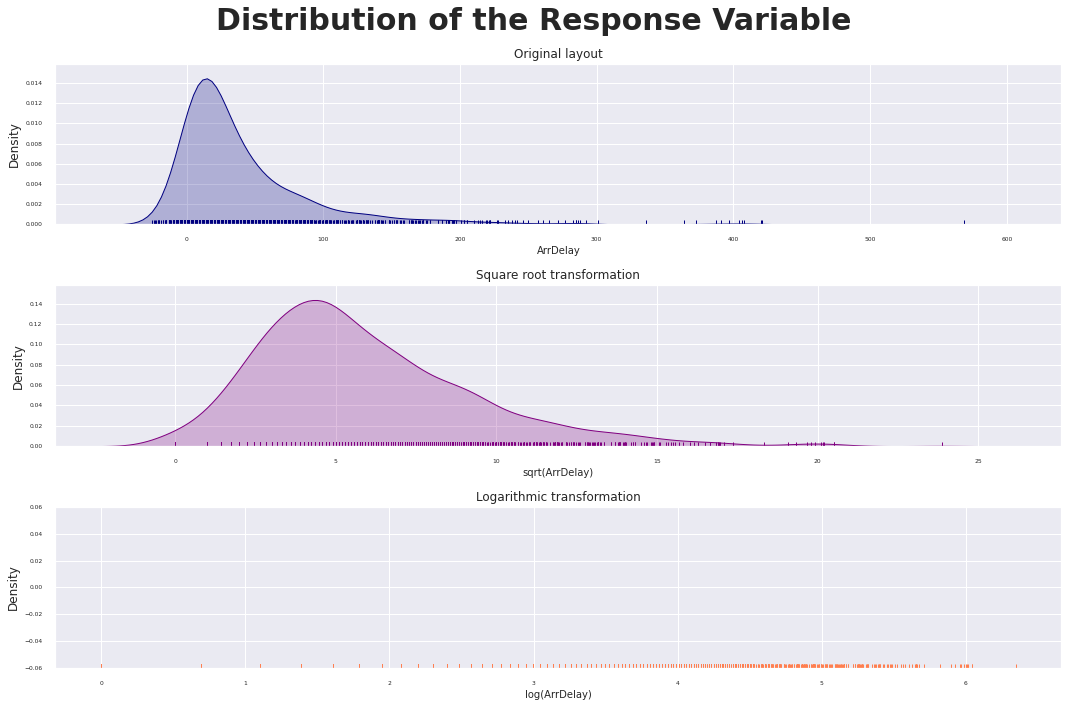

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.ArrDelay,
    hist    = False,
    rug     = True,
    color   = "navy",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrDelay', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrDelay)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "coral",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrDelay)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.suptitle('Distribution of the Response Variable', fontsize = 30, fontweight = "bold")
fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Response_Variable.png");

## Numerical variables

In [18]:
df.select_dtypes(include=['float64', 'int']).describe().round(3)

ID     Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count     1937.000  1937.000    1937.000   1937.000  1937.000    1937.000   
mean   3383679.770     6.188      15.640      3.979  1525.730    1472.327   
std    2091877.698     3.527       8.625      1.955   446.757     421.887   
min       1682.000     1.000       1.000      1.000     6.000      10.000   
25%    1491121.000     3.000       8.000      2.000  1216.000    1145.000   
50%    3304630.000     6.000      16.000      4.000  1550.000    1511.000   
75%    5168977.000     9.000      23.000      5.000  1854.000    1820.000   
max    7008745.000    12.000      31.000      7.000  2356.000    2359.000   

        ArrTime  CRSArrTime  ActualElapsedTime  CRSElapsedTime   AirTime  \
count  1931.000    1937.000           1931.000        1937.000  1931.000   
mean   1619.845    1642.602            130.875         132.051   106.202   
std     549.547     463.585             70.310          69.969    67.079   
min       2.000       1.000             32.000          30.000    14.000   
25%    1334.000    1345.000             78.000          80.000    56.000   
50%    1730.000    1715.000            113.000         115.000    88.000   
75%    2029.500    2010.000            161.000         161.000   134.000   
max    2359.000    2359.000            441.000         419.000   370.000   

       ArrDelay  DepDelay  Distance    TaxiIn   TaxiOut  CarrierDelay  \
count  1931.000  1937.000  1937.000  1931.000  1936.000      1269.000   
mean     42.474    43.697   749.702     6.686    18.019        18.381   
std      56.640    53.677   569.053     4.470    13.466        42.627   
min     -25.000     6.000    45.000     1.000     1.000         0.000   
25%       9.000    12.000   334.000     4.000    10.000         0.000   
50%      24.000    24.000   594.000     6.000    14.000         1.000   
75%      55.000    53.000   984.000     8.000    21.000        19.000   
max     569.000   571.000  3329.000    44.000   137.000       569.000   

       WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
count      1269.000  1269.000       1269.000           1269.000  
mean          4.009    15.340          0.043             24.800  
std          20.647    36.476          0.923             42.243  
min           0.000     0.000          0.000              0.000  
25%           0.000     0.000          0.000              0.000  
50%           0.000     2.000          0.000              6.000  
75%           0.000    14.000          0.000             33.000  
max         285.000   421.000         25.000            387.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

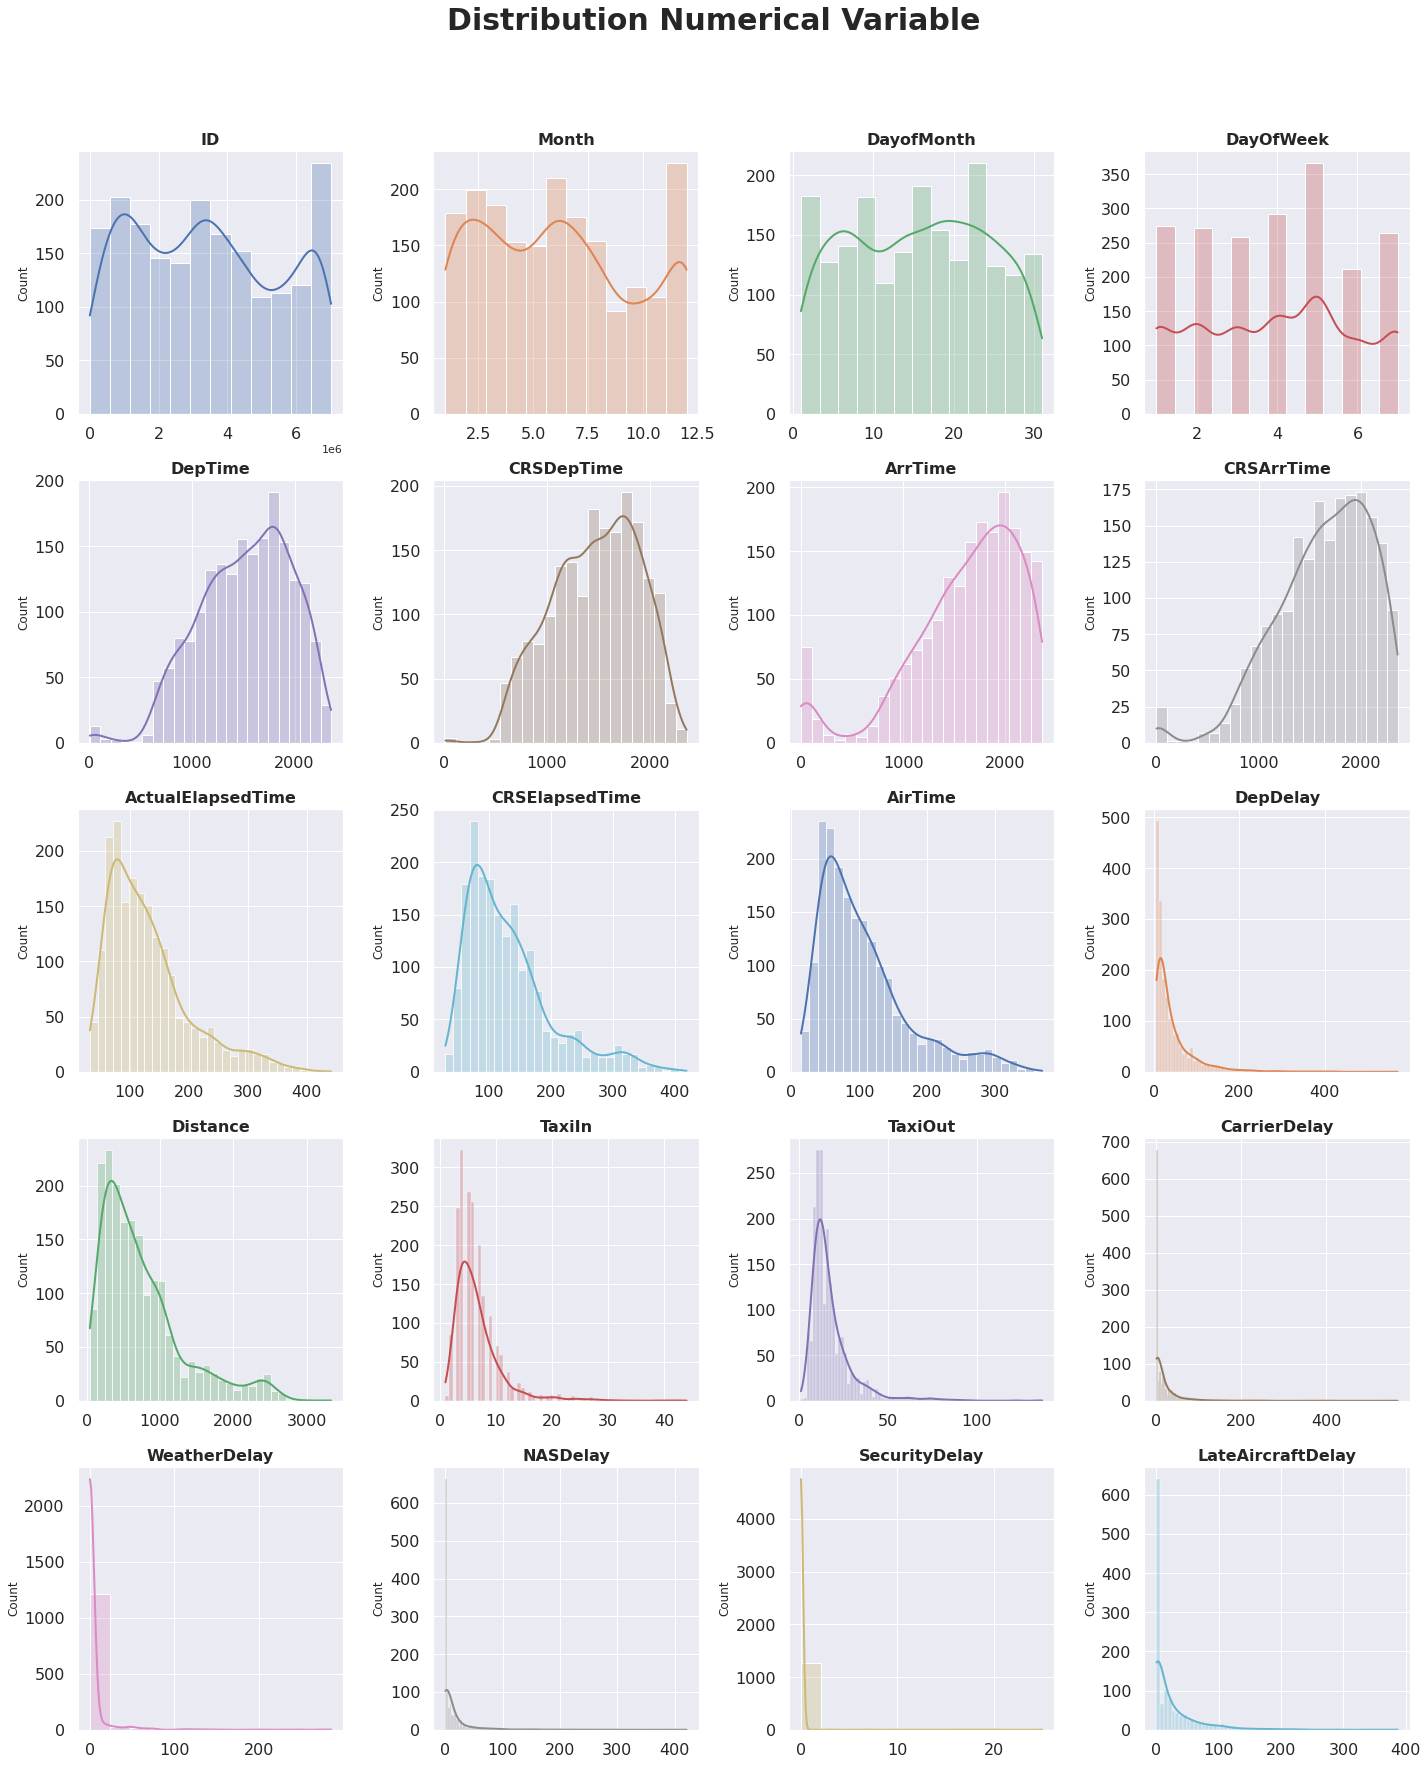

In [19]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20, 25))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

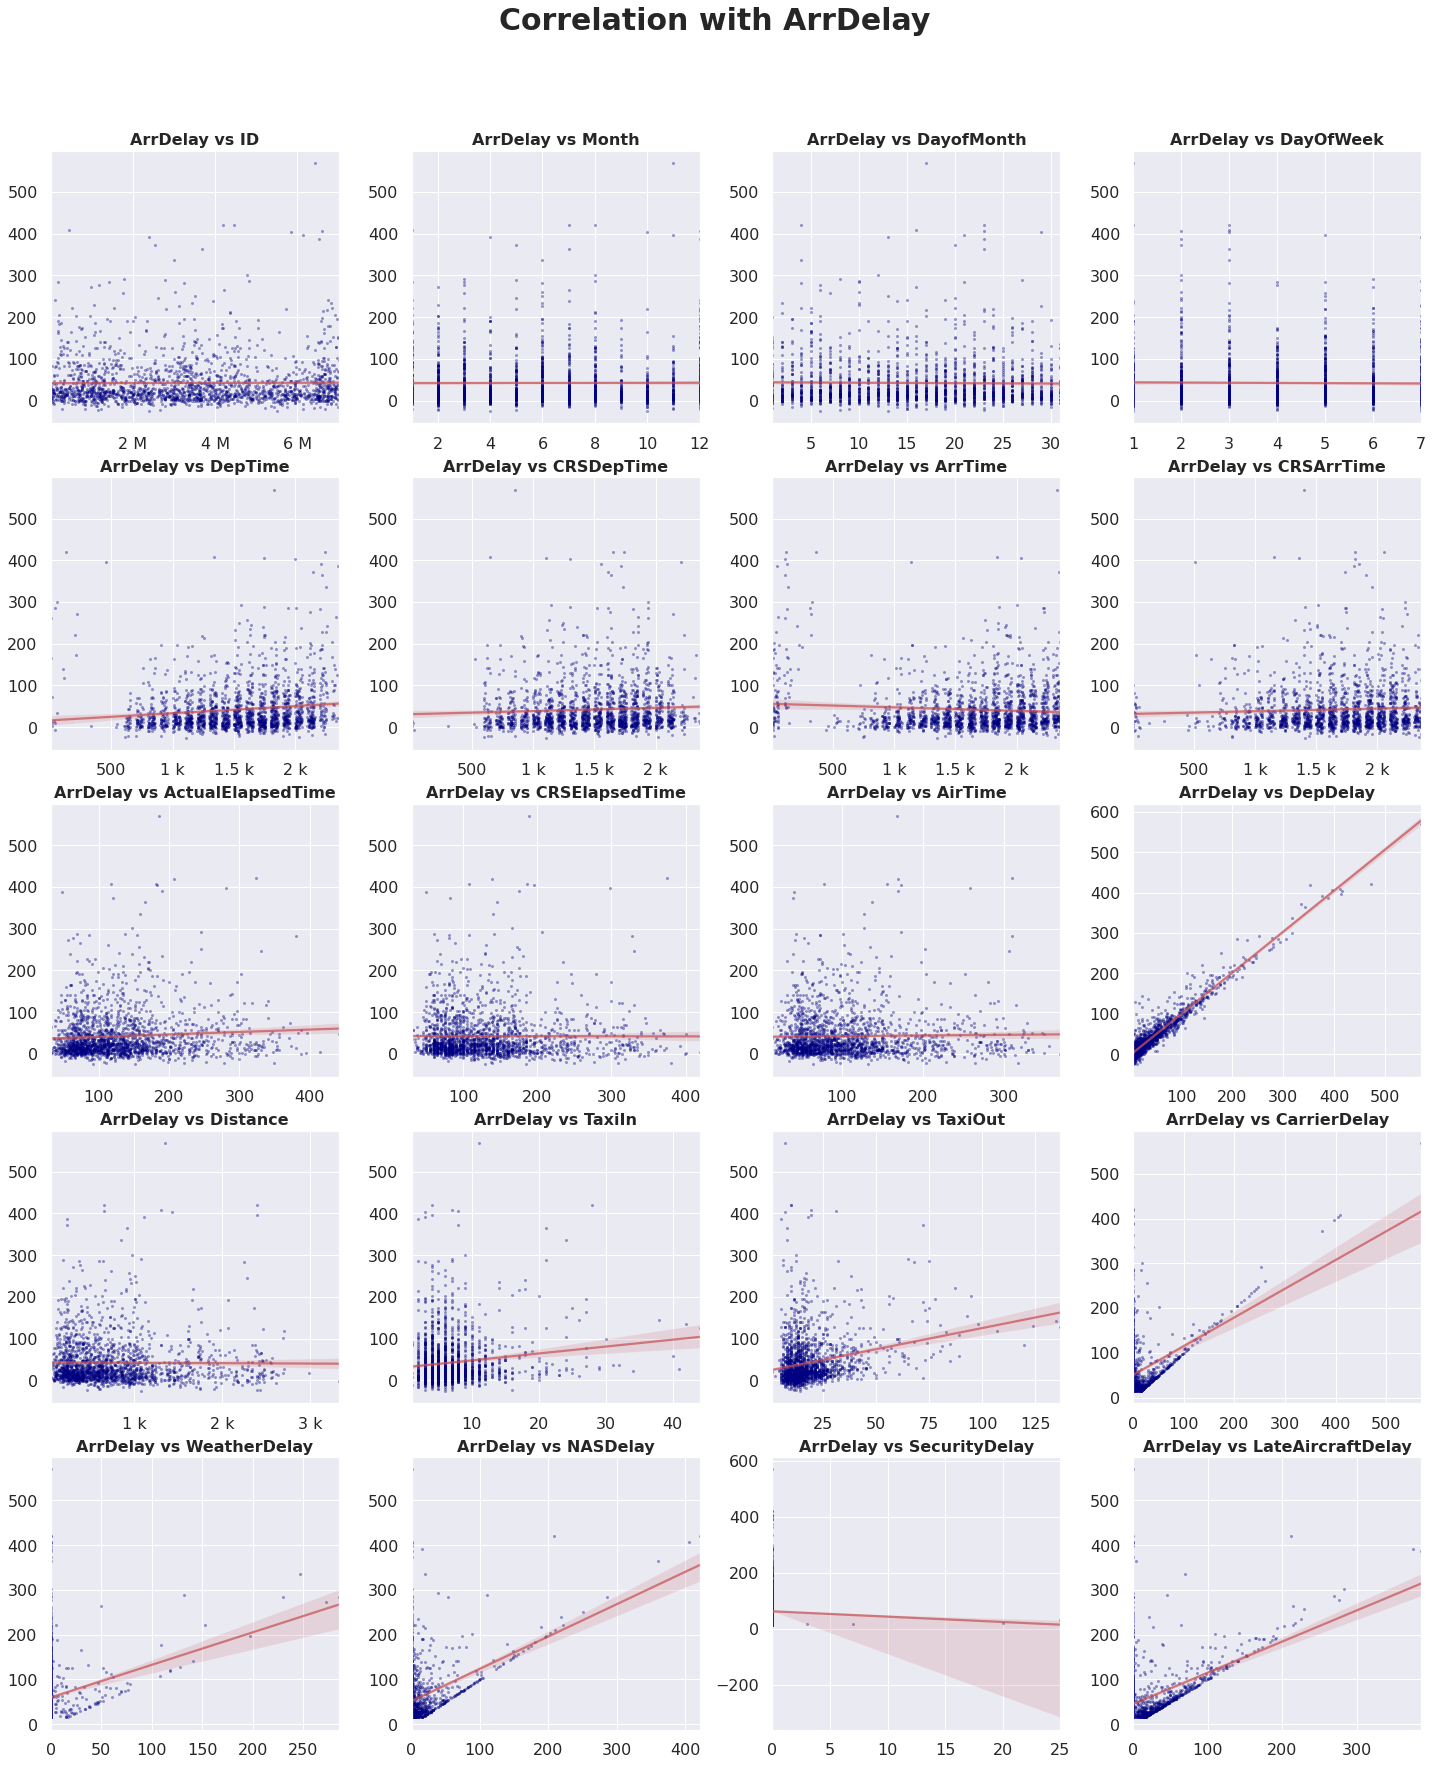

In [20]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(ncols=4, nrows=5,  figsize=(20, 25))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "navy",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 16, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Empty axes are removed
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png");

### We can observe a strong correlation with DepDelay

## Numerical variables correlation

In [21]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

<IPython.core.display.Javascript object>

variable_1         variable_2         r     abs_r
1                   ID              Month  0.996163  0.996163
21               Month                 ID  0.996163  0.996163
219            AirTime     CRSElapsedTime  0.986852  0.986852
199     CRSElapsedTime            AirTime  0.986852  0.986852
283           Distance            AirTime  0.981996  0.981996
223            AirTime           Distance  0.981996  0.981996
282           Distance     CRSElapsedTime  0.981914  0.981914
202     CRSElapsedTime           Distance  0.981914  0.981914
178  ActualElapsedTime            AirTime  0.978930  0.978930
218            AirTime  ActualElapsedTime  0.978930  0.978930

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

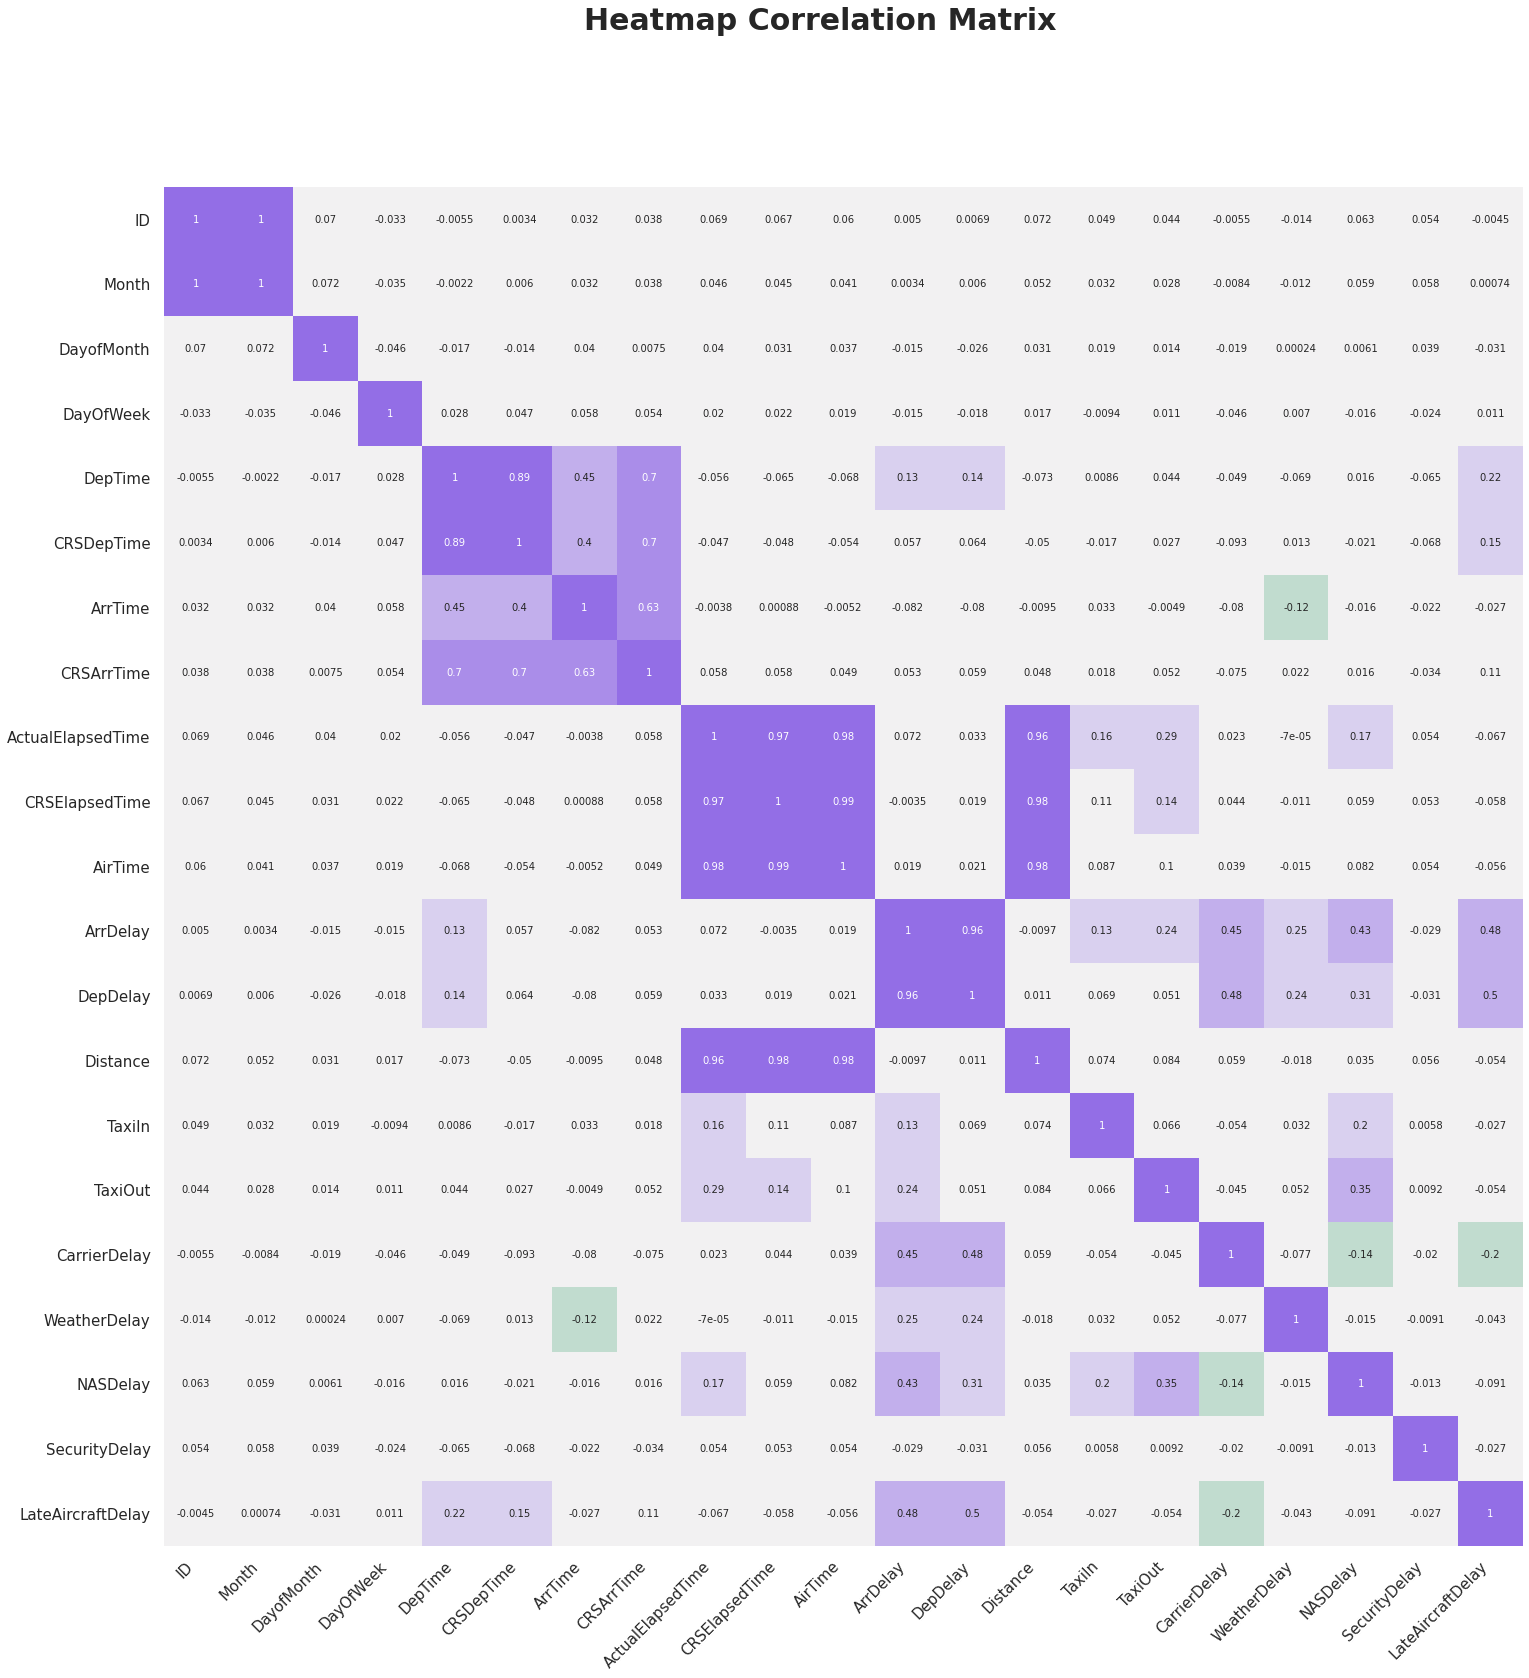

In [22]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)
fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png");

## Qualitative variables

In [23]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

UniqueCarrier TailNum Origin  Dest
count           1937    1937   1937  1937
unique            20    1559    180   186
top               WN  N776WN    ATL   ATL
freq             388       6    130   102

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

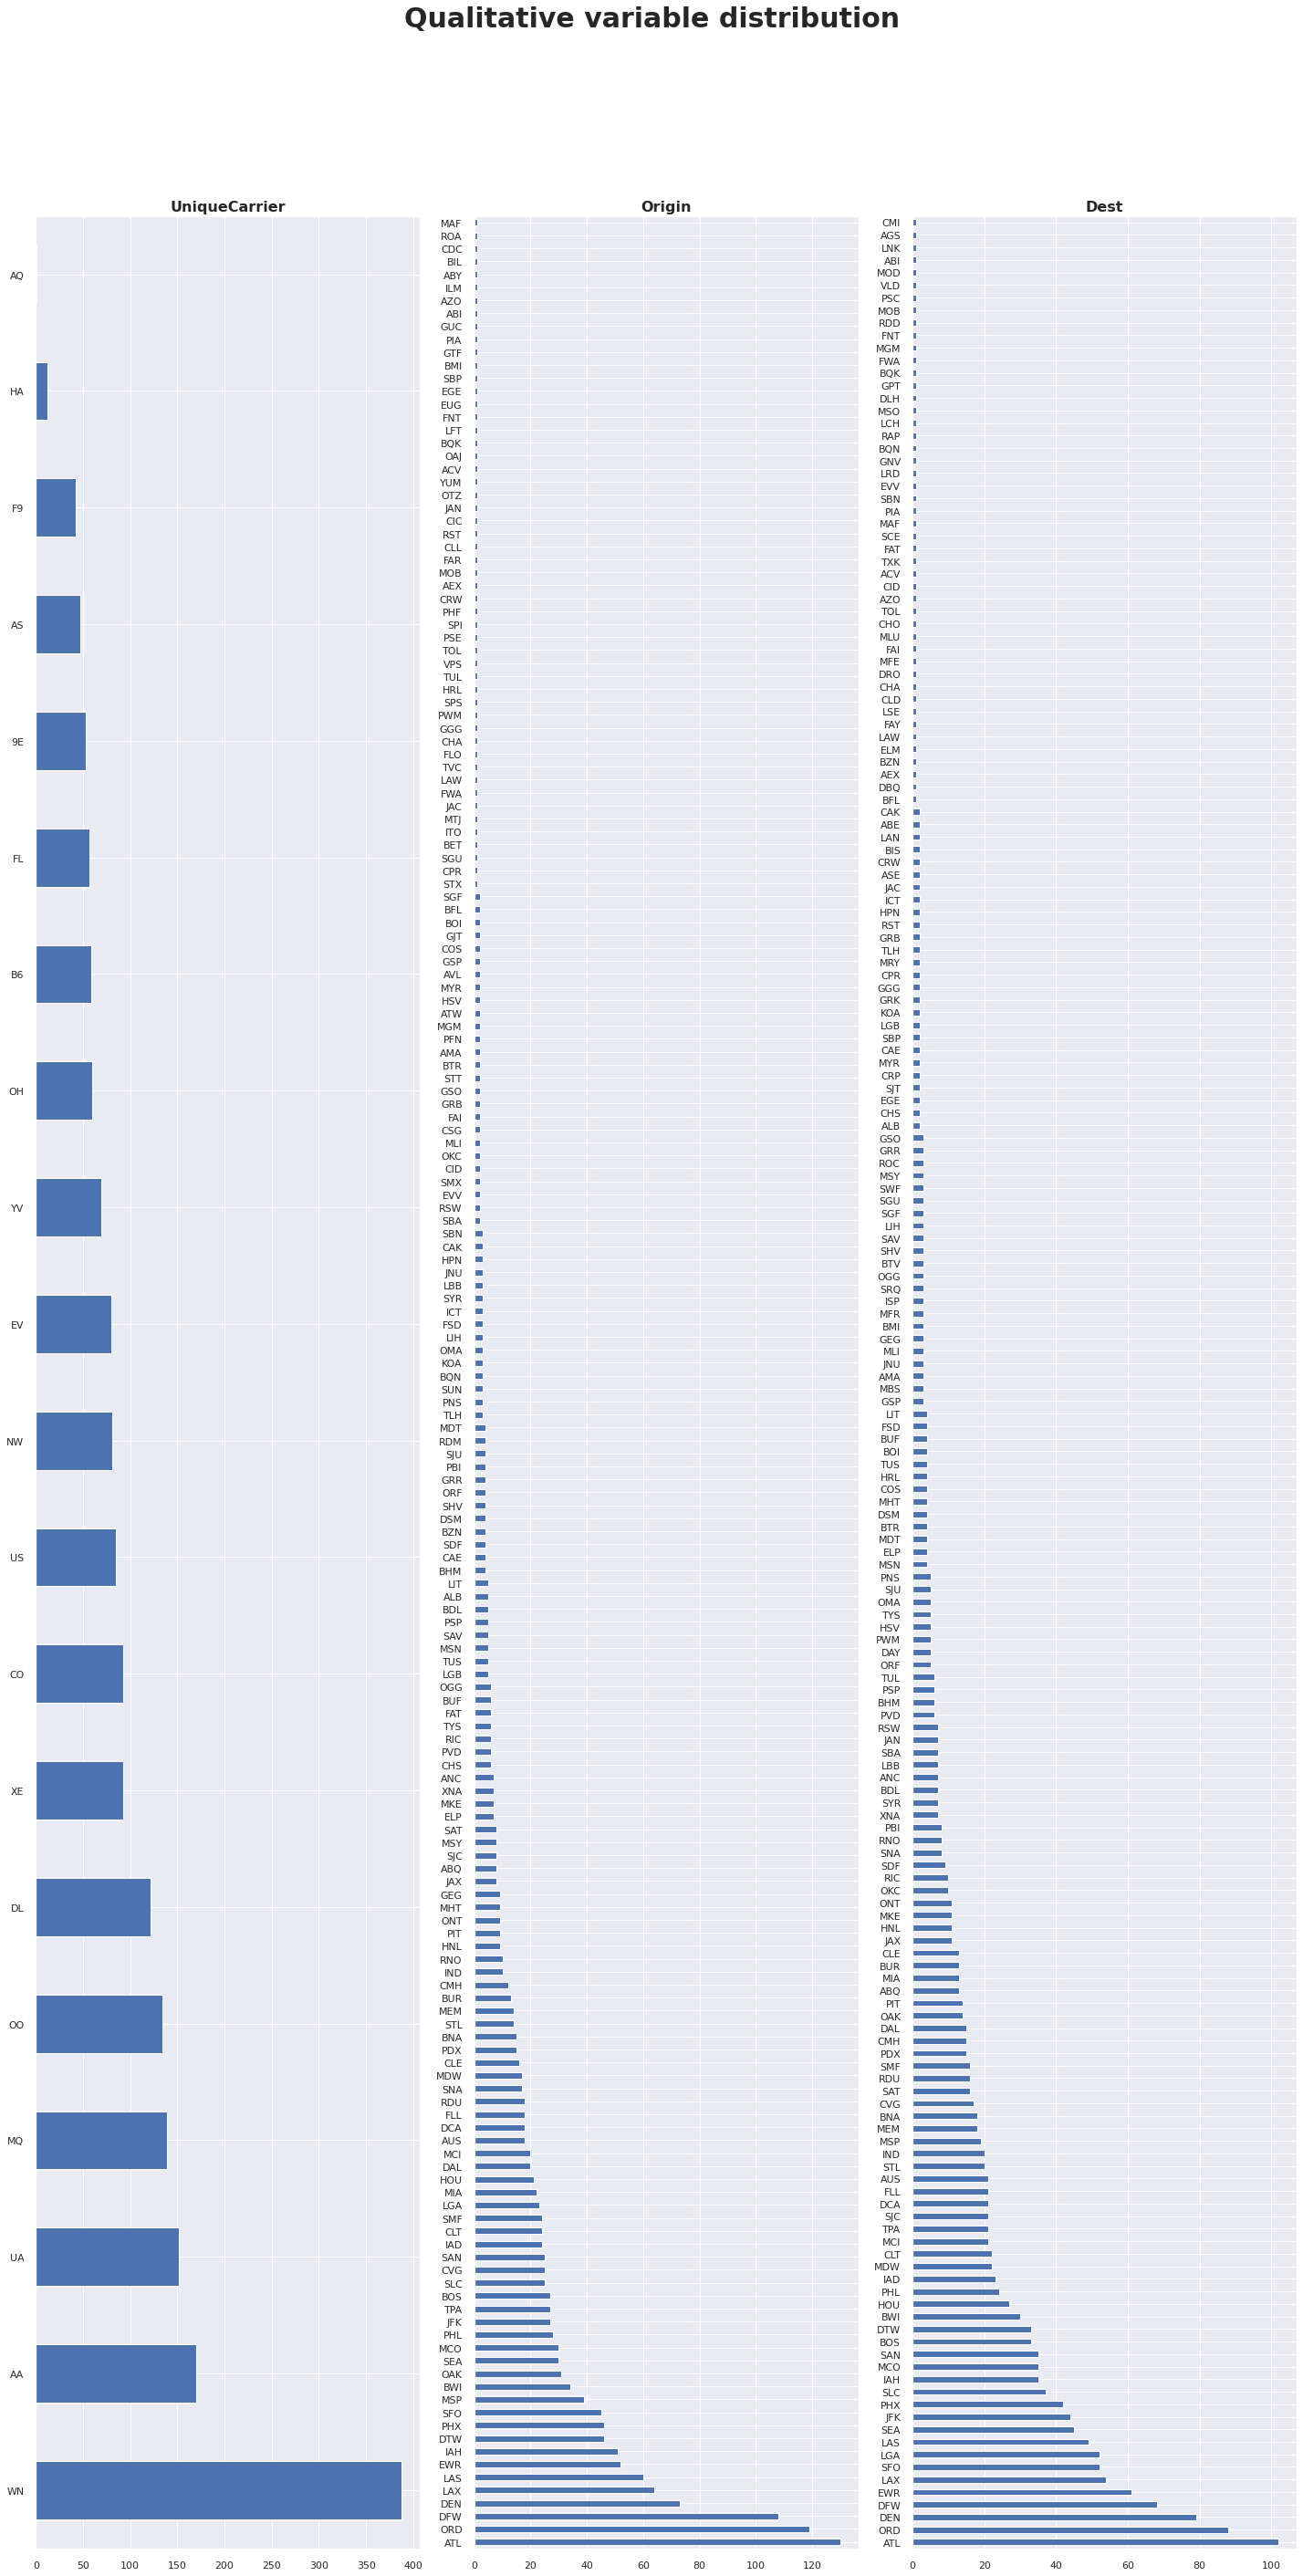

In [24]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('TailNum')

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Each_Qualtitative_Variable.png");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

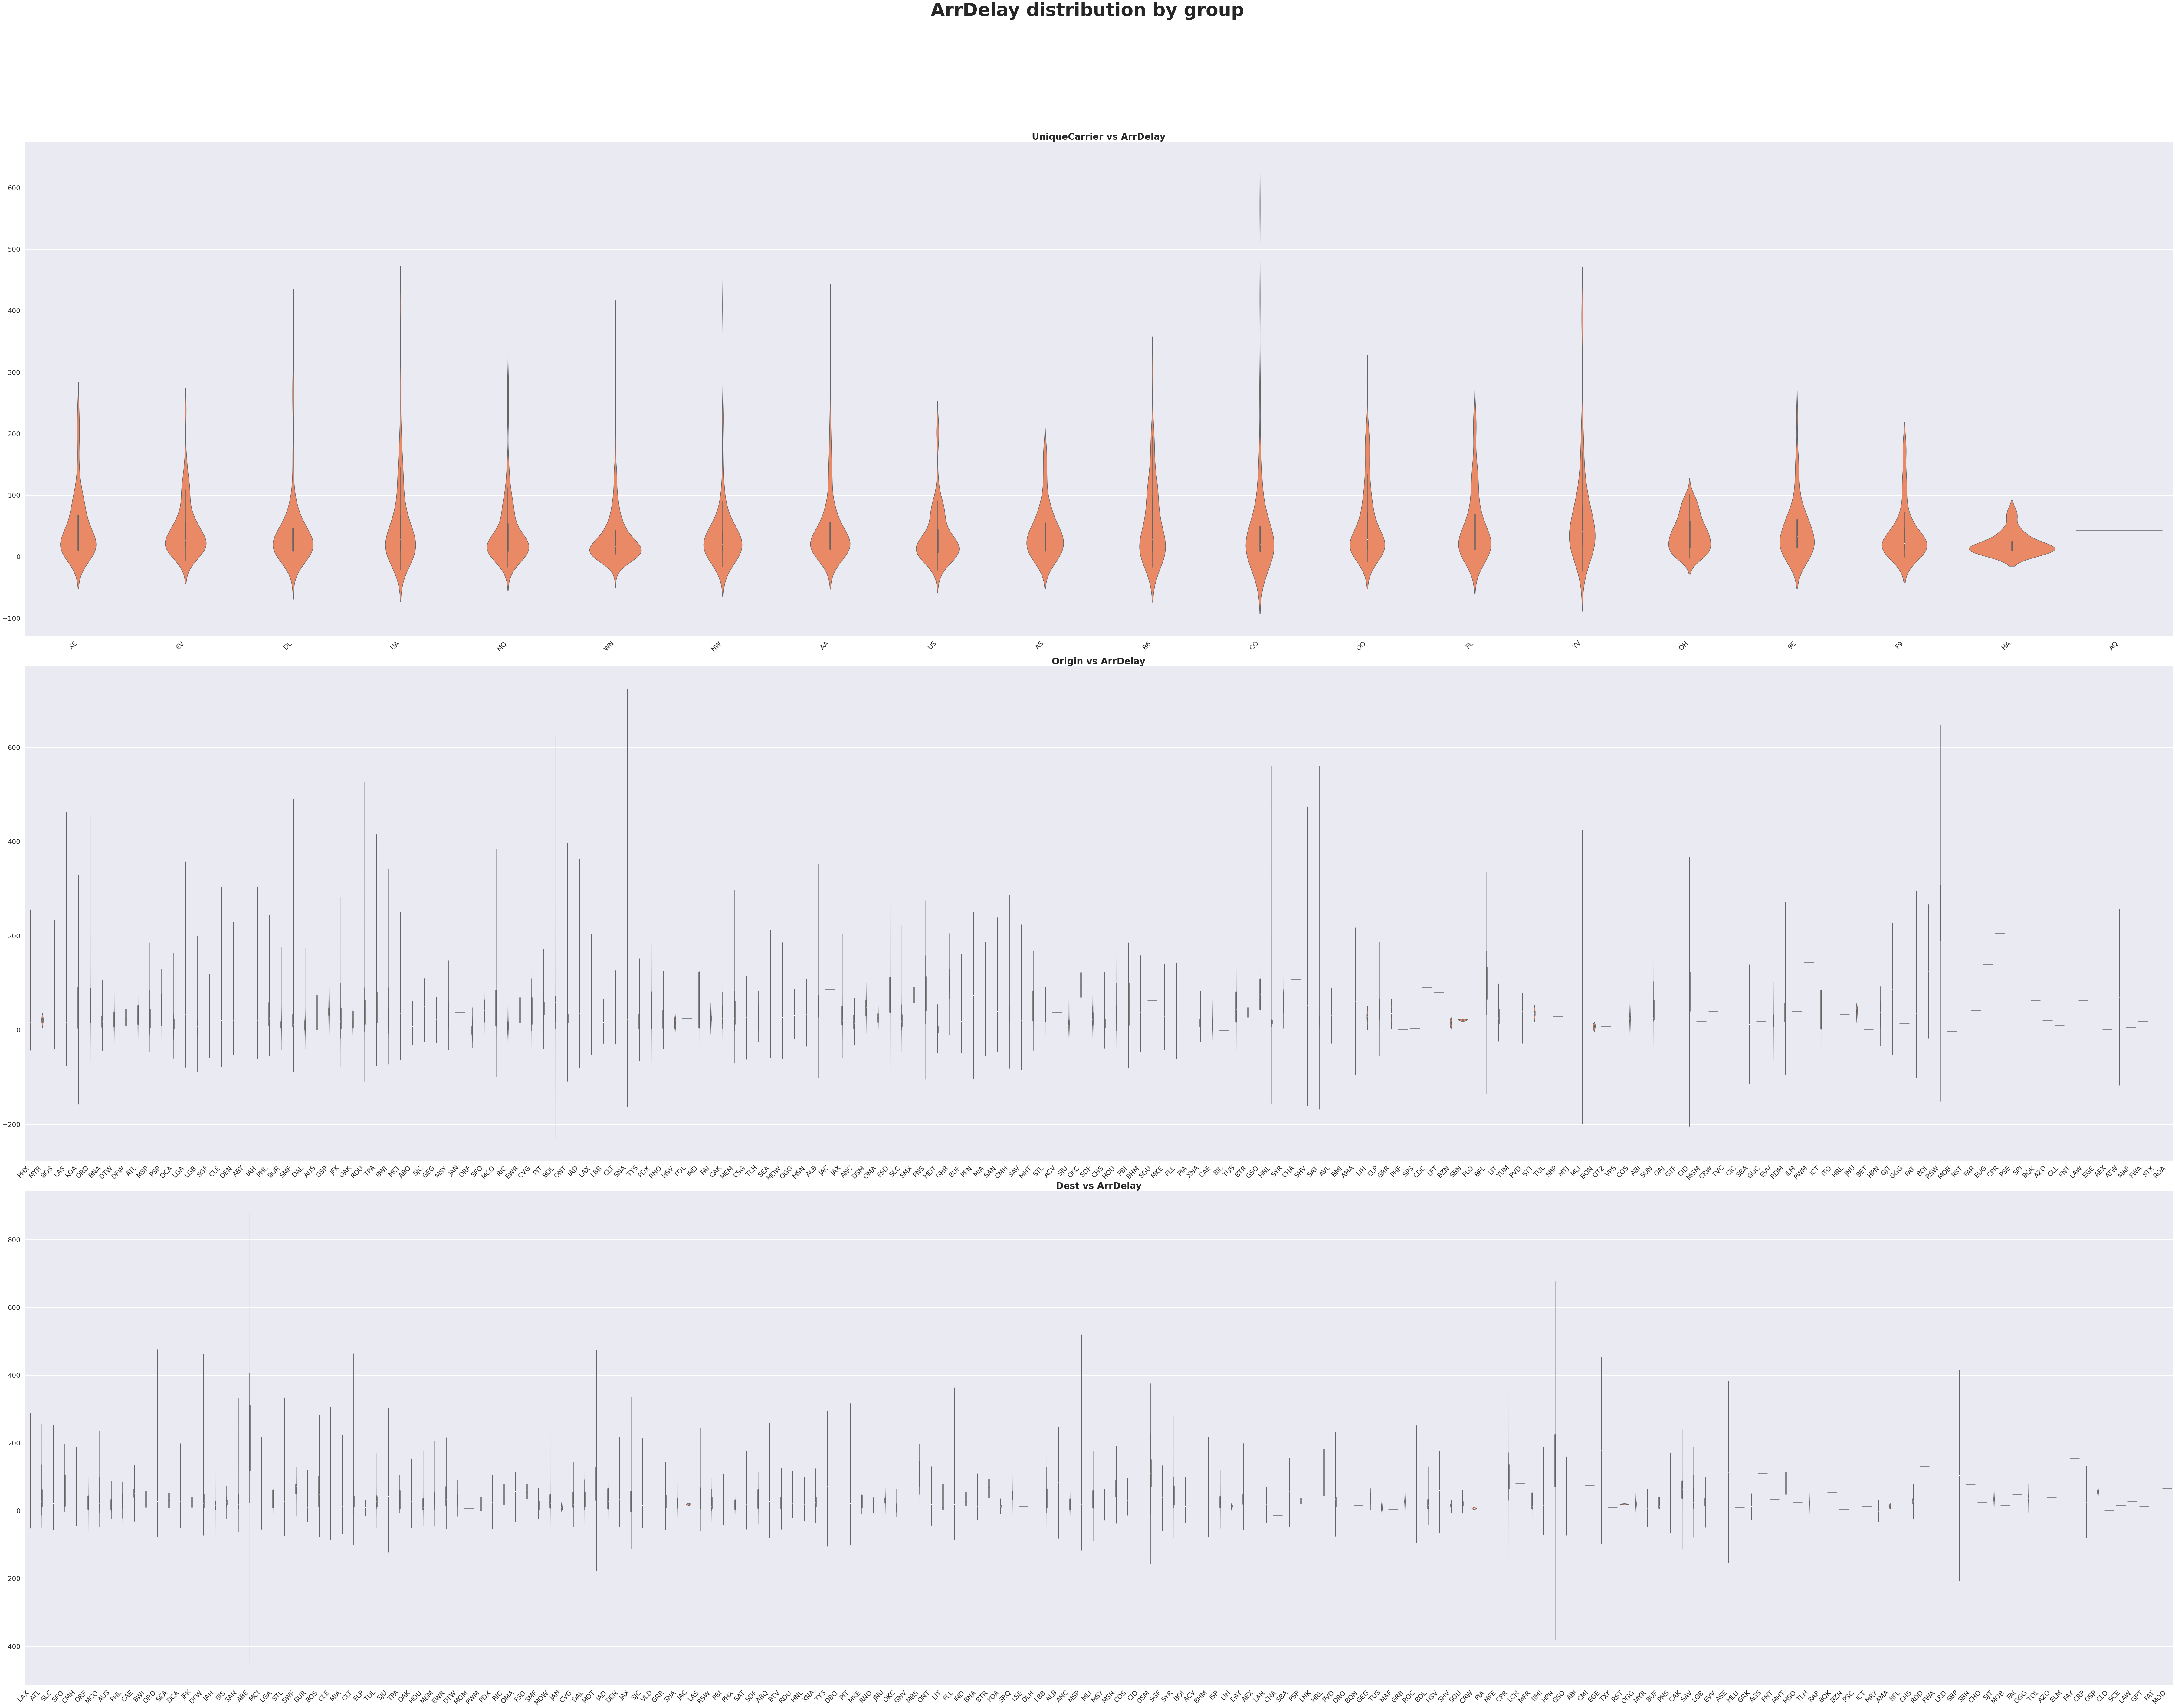

In [25]:
# Graph relationship between the ArrDelay and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(100, 80))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('TailNum')

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ArrDelay',
        data  = df,
        color = "coral",
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum} vs ArrDelay", fontsize = 30, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 22)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45, horizontalalignment = 'right')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 60, fontweight = "bold")
plt.savefig("../reports/figures/ArrDelay_vs_Qualitative_Variable.png");

### Graph Pie chart's for each qualitative variables

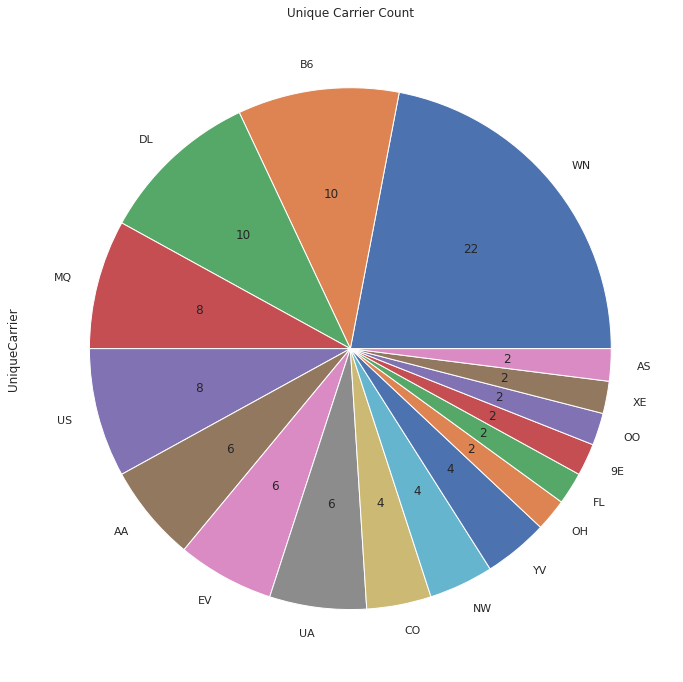

In [26]:
# Pie chart de UniqueCarrier
plot = df['UniqueCarrier'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Unique Carrier Count')

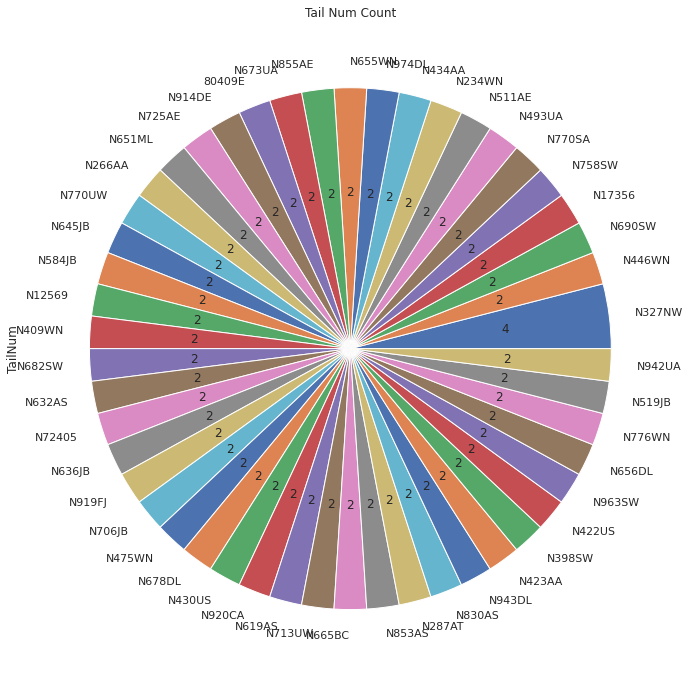

In [27]:
# Pie chart de UniqueCarrier
plot = df['TailNum'].head(50).value_counts().plot(kind='pie', autopct='%.0f',figsize=(12, 12),title='Tail Num Count')

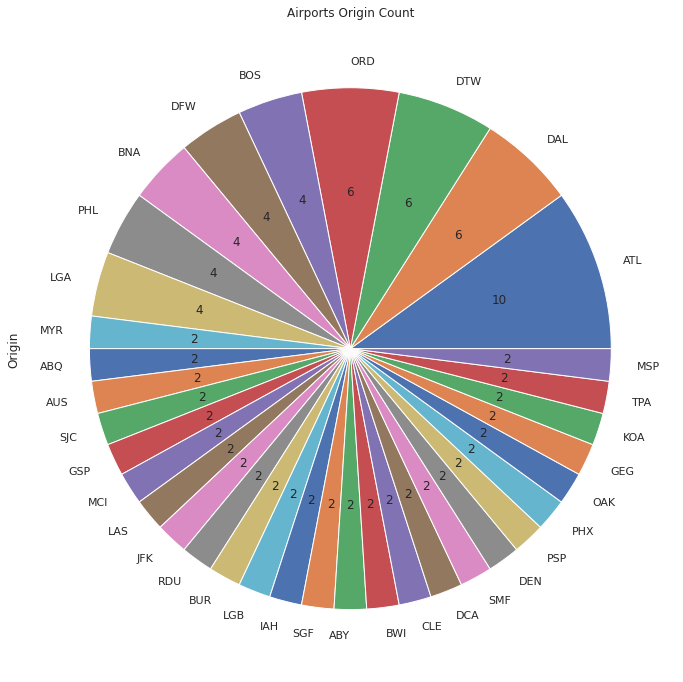

In [28]:
# Pie chart de Origin
plot = df['Origin'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Origin Count')

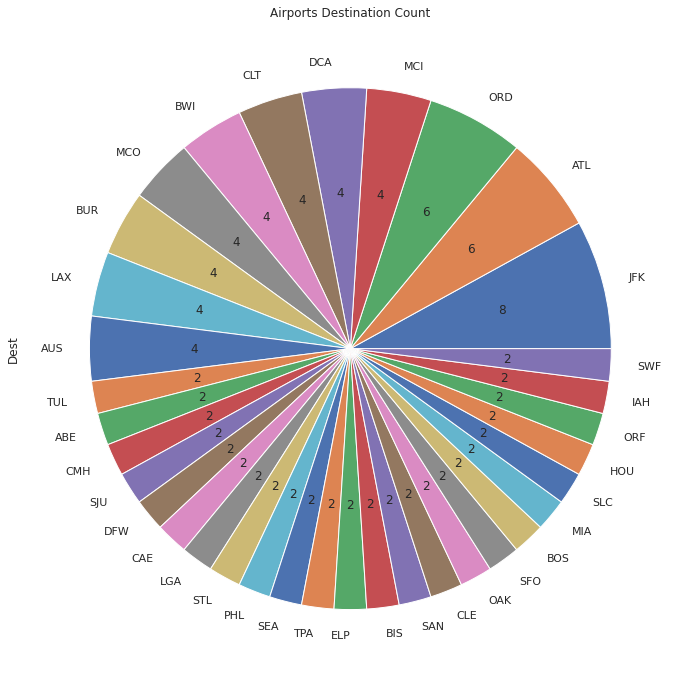

In [29]:
# Pie chart de Dest
plot = df['Dest'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Destination Count')

## Remove duplicates

In [30]:
df.drop_duplicates(inplace=True)

## Transform Categorical Variables

In [31]:
# Frecuency encoding

labels = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest']

for category in labels: 
    
    cat_map = df.groupby(category).size() / len(df)*100
    
    df[category] = df[category].map(cat_map)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1937 non-null   int64  
 1   Month              1937 non-null   int64  
 2   DayofMonth         1937 non-null   int64  
 3   DayOfWeek          1937 non-null   int64  
 4   DepTime            1937 non-null   float64
 5   CRSDepTime         1937 non-null   int64  
 6   ArrTime            1931 non-null   float64
 7   CRSArrTime         1937 non-null   int64  
 8   UniqueCarrier      1937 non-null   float64
 9   TailNum            1937 non-null   float64
 10  ActualElapsedTime  1931 non-null   float64
 11  CRSElapsedTime     1937 non-null   float64
 12  AirTime            1931 non-null   float64
 13  ArrDelay           1931 non-null   float64
 14  DepDelay           1937 non-null   float64
 15  Origin             1937 non-null   float64
 16  Dest              

## Imputation of missing values

In [33]:
df.isnull().sum().sum()

3371

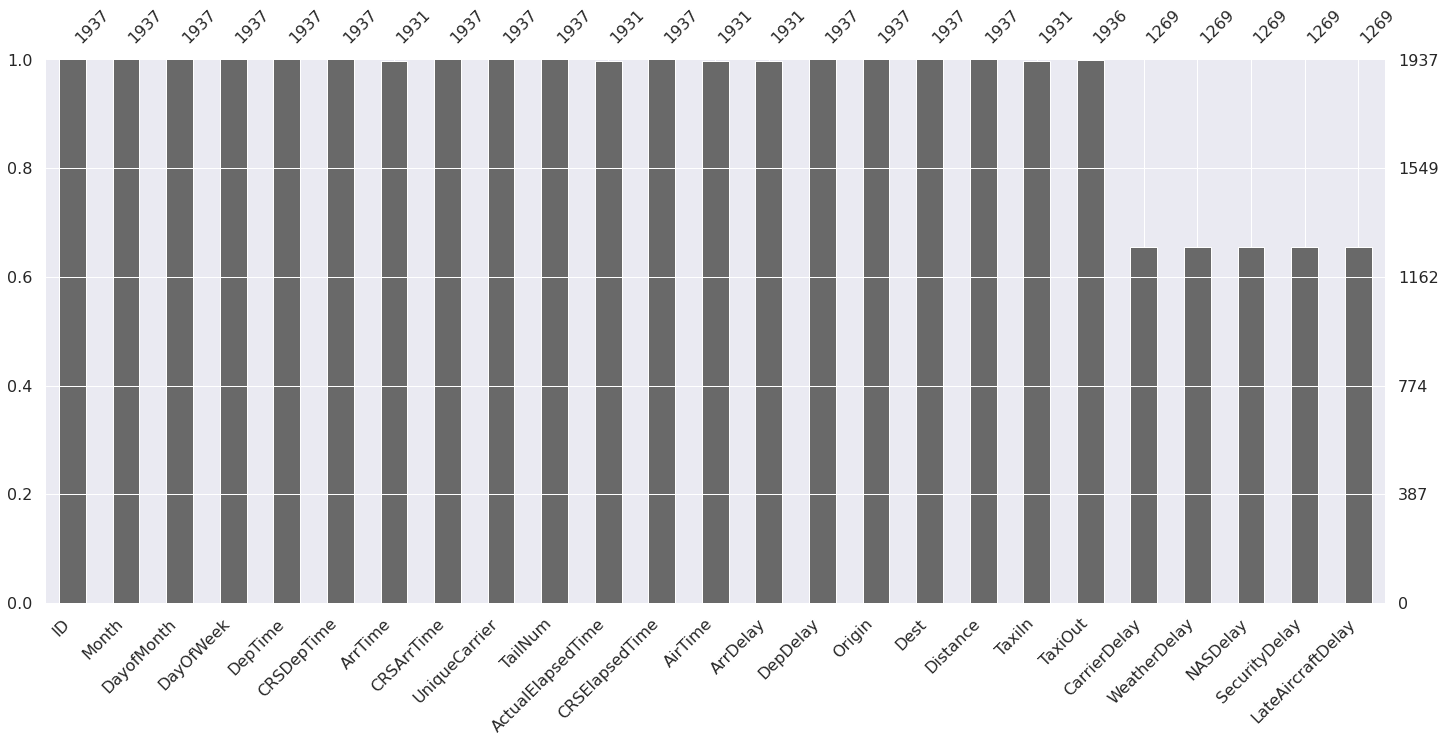

In [34]:
# Missing Values
msno.bar(df);

In [35]:
# Script created for transform missing data
# ===============================================================================
import missing

In [36]:
df[:] = missing.transform(df[:])

In [37]:
df.isnull().sum().sum()

0

In [38]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
df.isna().any()

ID                   False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime              False
CRSDepTime           False
ArrTime              False
CRSArrTime           False
UniqueCarrier        False
TailNum              False
ActualElapsedTime    False
CRSElapsedTime       False
AirTime              False
ArrDelay             False
DepDelay             False
Origin               False
Dest                 False
Distance             False
TaxiIn               False
TaxiOut              False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

In [40]:
df.to_csv(path + "processed/DelayedFlightsProcessed.csv", index = False, header = True)

*****************************************************************************
*****************************************************************************
*****************************************************************************
*****************************************************************************

# PCA

In [41]:
df = pd.read_csv(path + "processed/DelayedFlightsProcessed.csv")

<IPython.core.display.Javascript object>

In [42]:
# Choose features
data_for_clustering = df.values[:,1:]
data_for_clustering = np.nan_to_num(data_for_clustering)

data_for_clustering

<IPython.core.display.Javascript object>

array([[ 1.,  1.,  2., ...,  0.,  0., 81.],
       [ 3., 20.,  4., ..., 18.,  0.,  0.],
       [ 5.,  5.,  1., ..., 20.,  0.,  0.],
       ...,
       [ 1., 18.,  5., ..., 15.,  0.,  0.],
       [ 1.,  9.,  3., ...,  0.,  0., 37.],
       [ 4., 12.,  6., ..., 12.,  0., 50.]])

In [43]:
# Create data matrix
data_matrix = np.matrix(data_for_clustering).astype(float)

# Scale the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_data = mms.fit_transform(data_matrix)

<IPython.core.display.Javascript object>

In [44]:
pca = PCA(n_components= 4)
principalComponents = pca.fit_transform(data_for_clustering)

<IPython.core.display.Javascript object>

In [45]:
print(pca.explained_variance_ratio_.round(3))

[0.508 0.273 0.147 0.046]


## Plot the variations for each PC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

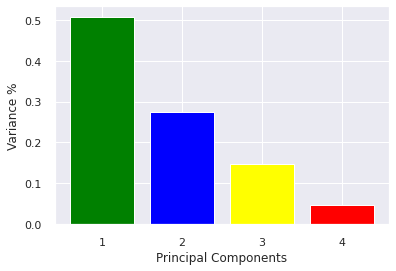

In [46]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color=('green', 'blue', 'yellow', 'red'))
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC);

## Create a dataframe of the components

In [47]:
PCA_components = pd.DataFrame(data= principalComponents, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
PCA_components.head().round(3)

<IPython.core.display.Javascript object>

PC 1      PC 2     PC 3     PC 4
0   466.419  -415.400  -39.357  134.649
1  -523.523  -404.861  -74.537  -33.841
2  1459.539  1370.667 -181.584  -24.282
3  -202.848  -518.080  -40.025  -10.710
4  -420.034  1704.779 -524.782  -44.644

# Clustering with K-Means

### Finding the optimal number of clusters

In [48]:
# Best K
# ==============================================================================

def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters= k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

# Best K Parallel
# ==============================================================================

def chooseBestKforKMeansParallel(scaled_data, k_range):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k_range: list of integers
        k range for applying KMeans
    Returns 
    -------
    best_k: int
        chosen value of k out of the given k range.
        chosen k is k with the minimum scaled inertia value.
    results: pandas DataFrame
        adjusted inertia value for each k in k_range
    '''
    
    ans = Parallel(n_jobs=-1,verbose=10)(delayed(kMeansRes)(scaled_data, k) for k in k_range)
    ans = list(zip(k_range,ans))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

# Best K Non Parallel
# ==============================================================================

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

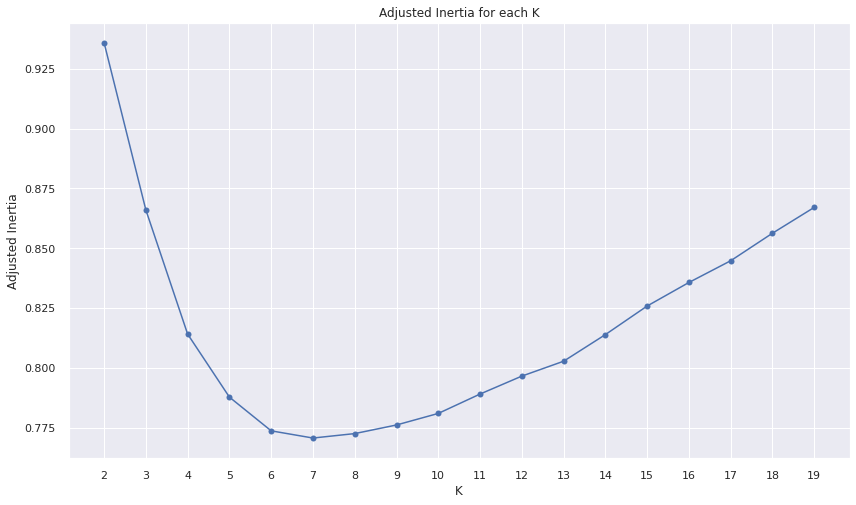

In [49]:
# Choose k range
k_range=range(2,20)

# Compute adjusted intertia
best_k, results = chooseBestKforKMeans(scaled_data, k_range)

results, best_k
# plot the results
plt.figure(figsize=(14,8))
plt.plot(results,'-o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1));

In [50]:
results

Scaled Inertia
k                 
2         0.935898
3         0.866021
4         0.814152
5         0.787826
6         0.773737
7         0.770732
8         0.772586
9         0.776187
10        0.781012
11        0.789107
12        0.796602
13        0.802819
14        0.813943
15        0.825890
16        0.835725
17        0.844802
18        0.856304
19        0.867102

In [51]:
print(r'Select %s clusters to execute Kmeans Model' %best_k)

Select 7 clusters to execute Kmeans Model


## Execute the Kmeans model with 7 clusters and adjust it to the components of the pca

In [52]:
k_means_pca = KMeans(init = "k-means++", n_clusters = 7, n_init = 12, random_state= 6858).fit(PCA_components)

<IPython.core.display.Javascript object>

## Verify the labels of the clustering

In [53]:
labels_pca = k_means_pca.labels_
labels_pca
clusters_pca = pd.concat([PCA_components, pd.DataFrame({'pca_clusters':labels_pca})], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Create the graph of the components

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

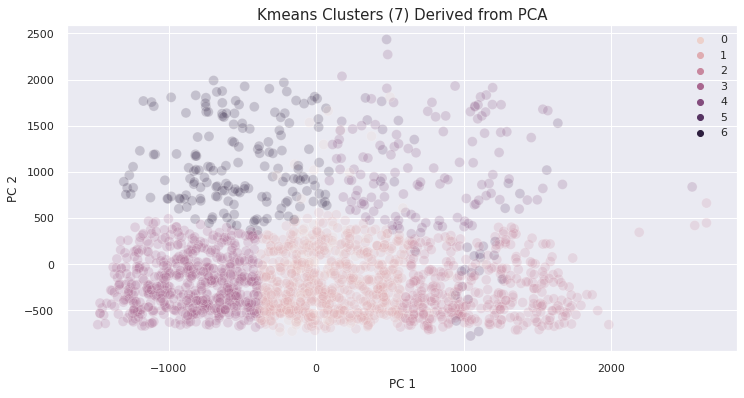

In [54]:
plt.figure(figsize=(12,6))

sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, s=100,
               alpha=0.2).set_title('Kmeans Clusters (7) Derived from PCA',
               fontsize=15)
                                   
plt.legend()
plt.show()

## Insert the Components in the Dataframe

In [55]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True), PCA_components], axis=1)

df_pca_kmeans.head()

<IPython.core.display.Javascript object>

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
2  2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
4  5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
1      1906.0       4.130098  0.051626              129.0           111.0   
2      1011.0       6.298400  0.051626              328.0           321.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
4      2029.0       7.847186  0.051626              296.0           299.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
2    302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0     18.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
4    280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0     10.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0           0.0       0.0            0.0               81.0   
1           8.0           0.0      18.0            0.0                0.0   
2           0.0           0.0      20.0            0.0                0.0   
3           0.0           0.0       0.0            0.0               16.0   
4           0.0           0.0       0.0            0.0              173.0   

          PC 1         PC 2        PC 3        PC 4  
0   466.419289  -415.399646  -39.356893  134.649349  
1  -523.522600  -404.861482  -74.536857  -33.841121  
2  1459.539018  1370.667238 -181.584072  -24.282052  
3  -202.848225  -518.079918  -40.025446  -10.710267  
4  -420.034300  1704.779232 -524.782081  -44.643981

## Add the labels of the clustering

In [56]:
df_pca_kmeans['Kmeans PCA'] = labels_pca
df_pca_kmeans.head(10)

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
2  2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
4  5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   
5  2799351.0    5.0         5.0        1.0   1547.0      1525.0   1800.0   
6  6549953.0   12.0        30.0        2.0   1952.0      1940.0   2219.0   
7  2214245.0    4.0        27.0        7.0   1221.0      1214.0   1457.0   
8  6939849.0   12.0        24.0        3.0   1845.0      1835.0   1941.0   
9  4502777.0    8.0         7.0        4.0   1356.0      1350.0   1712.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
1      1906.0       4.130098  0.051626              129.0           111.0   
2      1011.0       6.298400  0.051626              328.0           321.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
4      2029.0       7.847186  0.051626              296.0           299.0   
5      1740.0       7.176045  0.051626               73.0            75.0   
6      2235.0      20.030976  0.154879               87.0           115.0   
7      1440.0       4.181724  0.206505              156.0           146.0   
8      1935.0       8.776458  0.051626               56.0            60.0   
9      1656.0       4.388229  0.051626              136.0           126.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
2    302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0     18.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
4    280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0     10.0   
5     45.0      20.0      22.0  6.143521  0.774393     296.0     4.0     24.0   
6     75.0     -16.0      12.0  0.774393  0.258131     585.0     4.0      8.0   
7    129.0      17.0       7.0  2.374806  1.806918     957.0     5.0     22.0   
8     37.0       6.0      10.0  5.575632  1.084151     190.0     3.0     16.0   
9     97.0      16.0       6.0  6.143521  1.239029     678.0     5.0     34.0   

   CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  LateAircraftDelay  \
0      0.000000      0.000000   0.000000       0.000000          81.000000   
1      8.000000      0.000000  18.000000       0.000000           0.000000   
2      0.000000      0.000000  20.000000       0.000000           0.000000   
3      0.000000      0.000000   0.000000       0.000000          16.000000   
4      0.000000      0.000000   0.000000       0.000000         173.000000   
5      5.000000      0.000000   0.000000       0.000000          15.000000   
6     18.381403      4.008668  15.340426       0.043341          24.799842   
7      7.000000      0.000000  10.000000       0.000000           0.000000   
8     18.381403      4.008668  15.340426       0.043341          24.799842   
9      0.000000      0.000000  16.000000       0.000000           0.000000   

          PC 1         PC 2        PC 3        PC 4  Kmeans PCA  
0   466.419289  -415.399646  -39.356893  134.649349           1  
1  -523.522600  -404.861482  -74.536857  -33.841121           3  
2  1459.539018  1370.667238 -181.584072  -24.282052           4  
3  -202.848225  -518.079918  -40.025446  -10.710267           1  
4  -420.034300  1704.779232 -524.782081  -44.643981           6  
5  -196.425186  -448.047828 -138.522152  -43.934743           1  
6 -1053.443104  -128.192690  -73.550105  -70.095128           3  
7   464.212025   206.911859 -111.029530  -31.7

## Check Cllusters

In [57]:
df_cluster_0 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 0]
df_cluster_0.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
40  6964828.0   12.0        20.0        6.0   2216.0      1855.0     55.0   
57  5955102.0   11.0         7.0        5.0   2209.0      2125.0     25.0   
62  5487462.0   10.0        21.0        2.0   2230.0      2105.0     43.0   
76  1320996.0    3.0        20.0        4.0   2255.0      2220.0     30.0   
80    96734.0    1.0        15.0        2.0   2257.0      1855.0    206.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
40      2139.0       3.045947  0.051626              159.0           164.0   
57      2345.0      20.030976  0.154879              136.0           140.0   
62      2352.0       4.801239  0.051626              193.0           227.0   
76      2352.0       3.562210  0.051626               95.0            92.0   
80      2204.0       4.801239  0.051626              129.0           129.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
40    121.0     196.0     201.0  1.393908  2.271554    1005.0    27.0   
57    117.0      40.0      44.0  3.097574  0.774393     762.0     4.0   
62    171.0      51.0      85.0  2.684564  0.258131    1133.0     4.0   
76     66.0      38.0      35.0  1.239029  0.206505     413.0     7.0   
80    108.0     242.0     242.0  0.929272  0.567888     954.0     4.0   

    TaxiOut  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
40     11.0           8.0           0.0       0.0            0.0   
57     15.0           0.0           0.0       1.0            0.0   
62     18.0           0.0           0.0       0.0            0.0   
76     22.0          38.0           0.0       0.0            0.0   
80     17.0         242.0           0.0       0.0            0.0   

    LateAircraftDelay        PC 1        PC 2         PC 3        PC 4  \
40              188.0   83.552436  175.906302  1730.115279 -532.739100   
57               39.0 -131.421562  -58.664008  1853.147782 -673.967821   
62               51.0 -133.938517  326.516465  1867.144219 -641.780250   
76                0.0 -213.795935 -418.553198  1886.216820 -667.537302   
80                0.0  -52.154957  128.887638  1627.302350 -532.264882   

    Kmeans PCA  
40           0  
57           0  
62           0  
76           0  
80           0

In [58]:
df_cluster_0.describe()

ID      Month  DayofMonth  DayOfWeek      DepTime  \
count  7.500000e+01  75.000000   75.000000  75.000000    75.000000   
mean   3.358563e+06   6.146667   13.773333   3.786667  1972.973333   
std    2.054223e+06   3.482362    8.913357   2.042080   622.411613   
min    9.673400e+04   1.000000    1.000000   1.000000     8.000000   
25%    1.423018e+06   3.000000    5.500000   2.000000  2076.500000   
50%    3.484221e+06   6.000000   13.000000   3.000000  2202.000000   
75%    4.608884e+06   8.000000   21.000000   5.000000  2243.500000   
max    6.964828e+06  12.000000   30.000000   7.000000  2349.000000   

        CRSDepTime     ArrTime   CRSArrTime  UniqueCarrier    TailNum  \
count    75.000000   75.000000    75.000000      75.000000  75.000000   
mean   1978.800000   70.400000  2236.253333       8.778523   0.072965   
std     185.157639   82.500287   145.871574       6.214108   0.034048   
min    1305.000000    2.000000  1810.000000       2.168301   0.051626   
25%    1900.000000   14.000000  2204.000000       4.594734   0.051626   
50%    2010.000000   37.000000  2312.000000       6.917914   0.051626   
75%    2128.000000  108.000000  2344.500000       8.776458   0.103252   
max    2250.000000  326.000000  2359.000000      20.030976   0.206505   

       ActualElapsedTime  CRSElapsedTime     AirTime    ArrDelay    DepDelay  \
count          75.000000       75.000000   75.000000   75.000000   75.000000   
mean          156.360000      150.520000  124.226667  136.013333  130.173333   
std            80.302072       75.586421   72.672269  106.841445  104.344980   
min            45.000000       50.000000   21.000000    5.000000    6.000000   
25%            95.000000       90.500000   70.000000   49.000000   53.000000   
50%           145.000000      140.000000  111.000000  117.000000  110.000000   
75%           193.500000      179.000000  159.000000  189.500000  170.000000   
max           415.000000      419.000000  336.000000  420.000000  416.000000   

          Origin       Dest     Distance     TaxiIn     TaxiOut  CarrierDelay  \
count  75.000000  75.000000    75.000000  75.000000   75.000000     75.000000   
mean    2.858716   1.381518   905.960000   6.826667   25.306667     35.878760   
std     2.060366   1.164086   589.139098   5.220473   25.003229     73.745726   
min     0.103252   0.051626   109.000000   2.000000    5.000000      0.000000   
25%     1.239029   0.361384   450.000000   4.000000   10.000000      0.000000   
50%     2.374806   1.084151   838.000000   5.000000   16.000000      0.000000   
75%     3.768715   1.910170  1125.500000   7.500000   28.500000     20.190701   
max     6.711409   4.543108  2565.000000  28.000000  135.000000    404.000000   

       WeatherDelay    NASDelay  SecurityDelay  LateAircraftDelay  \
count     75.000000   75.000000      75.000000          75.000000   
mean      19.000578   25.609362       0.002889          59.079989   
std       60.913619   55.895981       0.010884          82.012258   
min        0.000000    0.000000       0.000000           0.000000   
25%        0.000000    0.000000       0.000000           0.000000   
50%        0.000000    1.000000       0.000000          24.799842   
75%        2.004334   26.500000       0.000000          94.500000   
max      285.000000  360.000000       0.043341         387.000000   

              PC 1         PC 2         PC 3         PC 4  Kmeans PCA  
count    75.000000    75.000000    75.000000    75.000000        75.0  
mean     85.350814    94.927487  1663.508347  -678.725302         0.0  
std     301.062143   600.627786   316.334945   243.612006         0.0  
min    -267.893757  -736.194008   630.082814 -1421.383131         0.0  
25%    -105.038382  -348.476586  1625.433536  -713.692474         0.0  
50%     -17.176121     5.858585  1761.393335  -641.780250         0.0  
75%     148.367700   308.549420  1845.384586  -554.740007         0.0  
max    1134.906476  1810.185712  1969.495020  -304.117528         0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ArrDelay', ylabel='Count'>

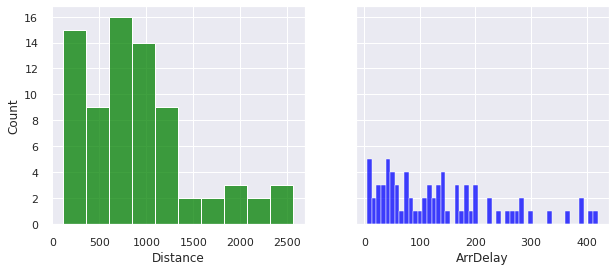

In [59]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_0, x="Distance",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_0, x="ArrDelay",color="blue", ax=ax2, bins=50)


In [60]:
df_cluster_1 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 1]
df_cluster_1.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
5  2799351.0    5.0         5.0        1.0   1547.0      1525.0   1800.0   
7  2214245.0    4.0        27.0        7.0   1221.0      1214.0   1457.0   
9  4502777.0    8.0         7.0        4.0   1356.0      1350.0   1712.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
5      1740.0       7.176045  0.051626               73.0            75.0   
7      1440.0       4.181724  0.206505              156.0           146.0   
9      1656.0       4.388229  0.051626              136.0           126.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
5     45.0      20.0      22.0  6.143521  0.774393     296.0     4.0     24.0   
7    129.0      17.0       7.0  2.374806  1.806918     957.0     5.0     22.0   
9     97.0      16.0       6.0  6.143521  1.239029     678.0     5.0     34.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0           0.0       0.0            0.0               81.0   
3           0.0           0.0       0.0            0.0               16.0   
5           5.0           0.0       0.0            0.0               15.0   
7           7.0           0.0      10.0            0.0                0.0   
9           0.0           0.0      16.0            0.0                0.0   

         PC 1        PC 2        PC 3        PC 4  Kmeans PCA  
0  466.419289 -415.399646  -39.356893  134.649349           1  
3 -202.848225 -518.079918  -40.025446  -10.710267           1  
5 -196.425186 -448.047828 -138.522152  -43.934743           1  
7  464.212025  206.911859 -111.029530  -31.700971           1  
9   78.702325  -53.695353 -205.055759  -78.907044           1

In [61]:
df_cluster_1.describe().round(3)

ID    Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count      585.000  585.000     585.000    585.000   585.000     585.000   
mean   3365162.952    6.164      15.986      4.017  1460.921    1392.957   
std    2097263.031    3.541       8.663      2.016   160.047     154.028   
min       1682.000    1.000       1.000      1.000  1054.000    1035.000   
25%    1511172.000    3.000       8.000      2.000  1332.000    1250.000   
50%    3276863.000    6.000      16.000      4.000  1449.000    1410.000   
75%    5269465.000    9.000      23.000      6.000  1605.000    1516.000   
max    6991751.000   12.000      31.000      7.000  2107.000    2100.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   585.000     585.000        585.000  585.000            585.000   
mean   1643.189    1573.884          8.468    0.075            108.504   
std     159.178     162.619          6.216    0.036             41.518   
min    1322.000       5.000          0.620    0.052             32.000   
25%    1521.000    1440.000          4.130    0.052             74.000   
50%    1638.000    1600.000          6.918    0.052            103.000   
75%    1756.000    1710.000          8.776    0.103            137.000   
max    2357.000    1930.000         20.031    0.310            270.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay   Origin     Dest  \
count         585.000  585.000   585.000   585.000  585.000  585.000   
mean          108.585   84.115    40.460    41.161    2.242    1.886   
std            38.221   36.689    50.627    47.382    2.190    1.547   
min            30.000   17.000   -21.000     6.000    0.052    0.052   
25%            75.000   53.000     9.000    12.000    0.465    0.723   
50%           103.000   78.000    26.000    25.000    1.291    1.239   
75%           140.000  112.000    51.000    50.000    3.098    2.788   
max           206.000  202.000   406.000   396.000    6.711    5.266   

       Distance   TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
count   585.000  585.000  585.000       585.000       585.000   585.000   
mean    553.838    6.590   17.855        16.642         3.326    17.360   
std     295.134    3.994   13.876        26.574        10.826    33.696   
min      45.000    1.000    4.000         0.000         0.000     0.000   
25%     296.000    4.000   10.000         0.000         0.000     0.000   
50%     508.000    6.000   14.000        18.381         0.000    15.340   
75%     765.000    8.000   20.000        18.381         4.009    15.340   
max    1300.000   34.000  137.000       253.000       132.000   406.000   

       SecurityDelay  LateAircraftDelay     PC 1     PC 2     PC 3      PC 4  \
count        585.000            585.000  585.000  585.000  585.000   585.000   
mean           0.015             23.412   83.945 -197.512  -97.508     7.846   
std            0.021             29.549  280.537  305.496   75.318   107.279   
min            0.000              0.000 -384.453 -720.405 -433.794  -175.241   
25%            0.000              0.000 -156.804 -466.858 -146.026   -36.876   
50%            0.000             24.800   57.259 -246.445  -84.059    -3.740   
75%            0.043             24.800  329.434   28.869  -45.521    35.991   
max            0.043            229.000  634.237  557.193  217.031  2004.759   

       Kmeans PCA  
count       585.0  
mean          1.0  
std           0.0  
min           1.0  
25%           1.0  
50%           1.0  
75%           1.0  
max           1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

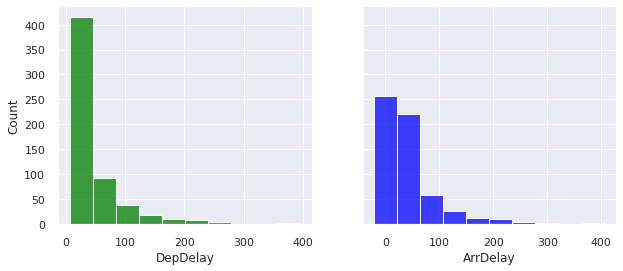

In [62]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_1, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_1, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [63]:
df_cluster_2 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 2]
df_cluster_2.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
17  2785746.0    5.0        25.0        7.0    848.0       840.0   1010.0   
18  1747516.0    3.0        21.0        5.0    836.0       825.0   1029.0   
19  1972274.0    4.0        23.0        3.0   1029.0      1015.0   1303.0   
26  3414618.0    6.0        16.0        1.0    906.0       830.0   1024.0   
27  4307120.0    8.0        25.0        1.0    902.0       840.0   1020.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
17      1005.0       7.176045  0.154879               82.0            85.0   
18      1038.0       4.801239  0.103252              173.0           193.0   
19      1252.0       6.917914  0.051626               94.0            97.0   
26       945.0       7.176045  0.051626               78.0            75.0   
27      1000.0      20.030976  0.051626               78.0            80.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
17     58.0       5.0       8.0  0.103252  3.510583     364.0    12.0   
18    158.0      -9.0      11.0  0.826020  1.806918    1091.0     5.0   
19     67.0      11.0      14.0  3.768715  0.103252     517.0     4.0   
26     44.0      39.0      36.0  1.393908  2.271554     187.0    13.0   
27     67.0      20.0      22.0  1.032525  1.084151     461.0     5.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
17     12.0     18.381403      4.008668  15.340426       0.043341   
18     10.0     18.381403      4.008668  15.340426       0.043341   
19     23.0     18.381403      4.008668  15.340426       0.043341   
26     21.0     24.000000      0.000000   3.000000       0.000000   
27      6.0     16.000000      0.000000   0.000000       0.000000   

    LateAircraftDelay         PC 1        PC 2        PC 3       PC 4  \
17          24.799842  1261.276612 -422.248496 -142.709088 -67.471752   
18          24.799842  1270.254513  324.742441 -116.858641 -39.552883   
19          24.799842   813.205370 -249.090951 -198.009766 -69.943035   
26          12.000000  1255.462841 -604.396169 -146.660316  -7.541743   
27           4.000000  1235.255721 -330.313854 -121.001575 -33.066987   

    Kmeans PCA  
17           2  
18           2  
19           2  
26           2  
27           2

In [64]:
df_cluster_2.describe().round(3)

ID    Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count      362.000  362.000     362.000    362.000   362.000     362.000   
mean   3181994.566    5.873      15.309      3.732   938.083     900.069   
std    2142580.815    3.615       8.658      1.936   209.218     220.420   
min       4601.000    1.000       1.000      1.000    15.000      10.000   
25%    1296898.000    3.000       8.000      2.000   810.000     736.250   
50%    2986117.500    5.000      15.000      4.000   947.500     922.500   
75%    5143592.750    9.000      22.750      5.000  1116.750    1040.000   
max    7008745.000   12.000      31.000      7.000  1257.000    2359.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   362.000     362.000        362.000  362.000            362.000   
mean   1106.460    1052.456          8.034    0.077            101.160   
std     207.677     199.461          6.067    0.038             37.674   
min     139.000      26.000          0.620    0.052             34.000   
25%     954.250     920.250          4.130    0.052             72.250   
50%    1129.000    1055.000          6.298    0.052             92.000   
75%    1251.750    1223.000          7.847    0.103            127.750   
max    1619.845    1442.000         20.031    0.207            234.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay   Origin     Dest  \
count         362.000  362.000   362.000   362.000  362.000  362.000   
mean          101.724   77.722    31.392    32.157    2.208    1.838   
std            37.559   35.130    39.068    34.488    2.097    1.518   
min            37.000   18.000   -24.000     6.000    0.052    0.052   
25%            73.000   50.000     8.000    11.000    0.465    0.671   
50%            91.000   69.000    19.000    19.000    1.394    1.394   
75%           127.750  104.000    41.000    40.000    3.252    2.685   
max           207.000  185.000   213.000   224.000    6.711    5.266   

       Distance   TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
count   362.000  362.000  362.000       362.000       362.000   362.000   
mean    497.262    6.286   17.196        19.677         4.752    13.152   
std     288.353    3.858   11.403        25.750        16.569    20.200   
min      78.000    1.000    4.000         0.000         0.000     0.000   
25%     259.500    4.000   10.000         1.000         0.000     0.000   
50%     413.000    5.000   13.500        18.381         0.000    15.340   
75%     689.750    8.000   21.000        18.381         4.009    15.340   
max    1449.000   27.000   85.000       213.000       197.000   196.000   

       SecurityDelay  LateAircraftDelay      PC 1     PC 2     PC 3     PC 4  \
count        362.000            362.000   362.000  362.000  362.000  362.000   
mean           0.092             17.038  1118.116 -283.617 -141.081  -21.523   
std            1.112             20.604   375.195  298.268  102.987   65.210   
min            0.000              0.000   571.812 -714.417 -605.818 -213.995   
25%            0.000              0.000   784.940 -524.354 -179.986  -55.166   
50%            0.000             23.000  1053.406 -365.403 -136.532  -30.399   
75%            0.043             24.800  1380.234  -83.503  -98.513    6.654   
max           20.000            192.000  2649.116  660.565  846.699  514.488   

       Kmeans PCA  
count       362.0  
mean          2.0  
std           0.0  
min           2.0  
25%           2.0  
50%           2.0  
75%           2.0  
max           2.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

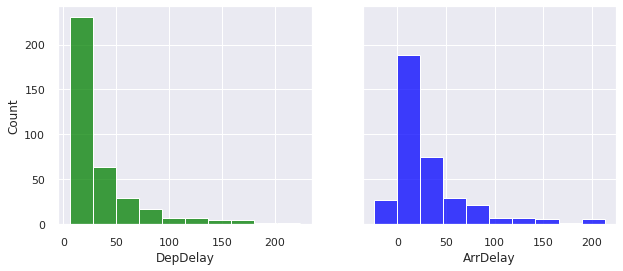

In [65]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_2, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_2, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [66]:
df_cluster_3 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 3]
df_cluster_3.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
1   1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
6   6549953.0   12.0        30.0        2.0   1952.0      1940.0   2219.0   
8   6939849.0   12.0        24.0        3.0   1845.0      1835.0   1941.0   
10  1172690.0    2.0        12.0        2.0   2035.0      2011.0   2142.0   
12  3420935.0    6.0        24.0        2.0   2128.0      2115.0   2242.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
1       1906.0       4.130098  0.051626              129.0           111.0   
6       2235.0      20.030976  0.154879               87.0           115.0   
8       1935.0       8.776458  0.051626               56.0            60.0   
10      2114.0       6.298400  0.051626               67.0            63.0   
12      2228.0       4.181724  0.206505               74.0            73.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
1     100.0      26.0       8.0  0.103252  5.265875     317.0    12.0   
6      75.0     -16.0      12.0  0.774393  0.258131     585.0     4.0   
8      37.0       6.0      10.0  5.575632  1.084151     190.0     3.0   
10     32.0      28.0      24.0  6.711409  0.103252     191.0     7.0   
12     49.0      14.0      13.0  2.013423  4.543108     334.0    11.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
1      17.0      8.000000      0.000000  18.000000       0.000000   
6       8.0     18.381403      4.008668  15.340426       0.043341   
8      16.0     18.381403      4.008668  15.340426       0.043341   
10     28.0     24.000000      0.000000   4.000000       0.000000   
12     14.0     18.381403      4.008668  15.340426       0.043341   

    LateAircraftDelay         PC 1        PC 2       PC 3       PC 4  \
1            0.000000  -523.522600 -404.861482 -74.536857 -33.841121   
6           24.799842 -1053.443104 -128.192690 -73.550105 -70.095128   
8           24.799842  -661.198870 -556.592374  14.709724   5.417542   
10           0.000000 -1033.933956 -544.539709  23.187156  24.388341   
12          24.799842 -1234.451007 -394.915065  44.343423  27.265813   

    Kmeans PCA  
1            3  
6            3  
8            3  
10           3  
12           3

In [67]:
df_cluster_3.describe().round(3)

ID    Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count      585.000  585.000     585.000    585.000   585.000     585.000   
mean   3417409.508    6.291      15.441      4.099  1932.759    1859.161   
std    2117206.307    3.562       8.678      1.916   151.615     155.491   
min       4806.000    1.000       1.000      1.000  1608.000    1455.000   
25%    1468974.000    3.000       8.000      3.000  1818.000    1735.000   
50%    3366896.000    6.000      16.000      4.000  1921.000    1840.000   
75%    5135485.000    9.000      23.000      5.000  2038.000    1955.000   
max    7007686.000   12.000      31.000      7.000  2308.000    2253.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   585.000     585.000        585.000  585.000            585.000   
mean   2105.391    2036.602          8.711    0.079            103.892   
std     151.886     153.293          6.436    0.041             38.383   
min    1619.845    1615.000          0.620    0.052             32.000   
25%    2004.000    1922.000          4.130    0.052             72.000   
50%    2115.000    2025.000          6.918    0.052            102.000   
75%    2231.000    2144.000          8.776    0.103            133.000   
max    2359.000    2357.000         20.031    0.310            236.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay   Origin     Dest  \
count         585.000  585.000   585.000   585.000  585.000  585.000   
mean          105.509   79.934    43.067    44.607    2.298    1.754   
std            36.714   34.200    49.191    46.020    2.098    1.539   
min            32.000   14.000   -17.000     6.000    0.052    0.052   
25%            75.000   52.000    11.000    14.000    0.774    0.465   
50%           100.000   76.000    26.000    27.000    1.394    1.136   
75%           135.000  104.000    59.000    60.000    3.304    2.685   
max           210.000  180.000   373.000   335.000    6.711    5.266   

       Distance   TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
count   585.000  585.000  585.000       585.000       585.000   585.000   
mean    526.421    6.822   17.133        15.521         3.140    13.472   
std     272.324    5.427   12.158        27.272        10.775    24.628   
min      72.000    1.000    1.000         0.000         0.000     0.000   
25%     304.000    4.000   10.000         0.000         0.000     0.000   
50%     489.000    5.000   13.000        13.000         0.000    11.000   
75%     732.000    7.000   20.000        18.381         4.009    15.340   
max    1197.000   44.000   98.000       373.000       118.000   285.000   

       SecurityDelay  LateAircraftDelay      PC 1     PC 2     PC 3     PC 4  \
count        585.000            585.000   585.000  585.000  585.000  585.000   
mean           0.014             29.217  -845.425 -202.068  -37.239   33.028   
std            0.020             37.009   281.809  282.985   71.290   62.283   
min            0.000              0.000 -1482.643 -685.077 -263.133 -120.115   
25%            0.000              0.000 -1076.570 -435.297  -86.485   -1.693   
50%            0.000             24.800  -827.611 -235.777  -31.566   25.023   
75%            0.043             25.000  -604.206    3.576   12.155   67.188   
max            0.043            277.000  -382.200  490.102  320.304  356.917   

       Kmeans PCA  
count       585.0  
mean          3.0  
std           0.0  
min           3.0  
25%           3.0  
50%           3.0  
75%           3.0  
max           3.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

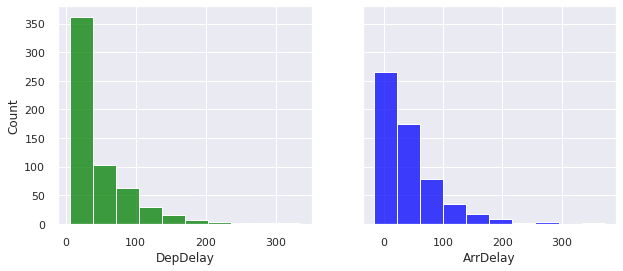

In [68]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_3, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_3, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [69]:
df_cluster_4 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 4]
df_cluster_4.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
2   2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
16  6420900.0   11.0        20.0        4.0   1059.0       850.0   1906.0   
28  3660939.0    7.0        20.0        7.0    651.0       645.0   1101.0   
56  1127848.0    2.0        19.0        2.0   1249.0      1225.0   1528.0   
87  4104725.0    7.0        18.0        5.0   1228.0      1215.0   1638.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
2       1011.0       6.298400  0.051626              328.0           321.0   
16      1704.0       3.045947  0.051626              307.0           314.0   
28      1100.0      20.030976  0.206505              190.0           195.0   
56      1540.0       3.045947  0.103252              159.0           195.0   
87      1640.0       8.776458  0.103252              190.0           205.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
2     302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0   
16    288.0     122.0     129.0  0.258131  2.271554    2465.0     9.0   
28    175.0       1.0       6.0  0.929272  1.548787    1342.0     6.0   
56    143.0     -12.0      24.0  1.548787  0.258131    1214.0     1.0   
87    174.0      -2.0      13.0  5.575632  1.239029    1302.0     5.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
2      18.0      0.000000      0.000000  20.000000       0.000000   
16     10.0     19.000000      0.000000   0.000000       0.000000   
28      9.0     18.381403      4.008668  15.340426       0.043341   
56     15.0     18.381403      4.008668  15.340426       0.043341   
87     11.0     18.381403      4.008668  15.340426       0.043341   

    LateAircraftDelay         PC 1         PC 2        PC 3        PC 4  \
2            0.000000  1459.539018  1370.667238 -181.584072  -24.282052   
16         103.000000   374.625062  1791.433458 -573.789779 -144.809653   
28          24.799842  1377.828678   595.764370 -312.864318 -159.902526   
56          24.799842   363.583258   474.680004 -128.634579  -61.920226   
87          24.799842   269.945780   583.234586 -218.373254 -116.068831   

    Kmeans PCA  
2            4  
16           4  
28           4  
56           4  
87           4

In [70]:
df_cluster_4.describe().round(3)

ID    Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count      125.000  125.000     125.000    125.000   125.000     125.000   
mean   3875688.496    6.896      15.592      4.128   983.168    1023.488   
std    1913196.356    3.242       7.702      2.032   278.848     335.395   
min      34806.000    1.000       1.000      1.000     6.000      15.000   
25%    2613991.000    5.000       9.000      2.000   844.000     830.000   
50%    3861360.000    7.000      16.000      4.000  1037.000    1020.000   
75%    5351915.000    9.000      21.000      6.000  1155.000    1131.000   
max    6990723.000   12.000      31.000      7.000  1535.000    2355.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   125.000     125.000        125.000  125.000            125.000   
mean   1422.863    1367.208          7.973    0.070            245.791   
std     308.076     302.645          5.218    0.034             59.478   
min     356.000     503.000          0.620    0.052            130.875   
25%    1210.000    1150.000          4.801    0.052            197.000   
50%    1436.000    1415.000          7.847    0.052            240.000   
75%    1634.000    1605.000          8.776    0.103            290.000   
max    1933.000    2055.000         20.031    0.207            383.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay   Origin     Dest  \
count         125.000  125.000    125.00   125.000  125.000  125.000   
mean          251.560  221.186     41.74    45.120    2.534    2.160   
std            58.564   57.213     72.28    73.853    1.761    1.131   
min           160.000  106.202    -25.00     6.000    0.052    0.155   
25%           203.000  174.000      6.00    10.000    1.239    1.136   
50%           240.000  214.000     20.00    20.000    2.375    2.272   
75%           300.000  265.000     46.00    44.000    3.304    2.788   
max           398.000  356.000    421.00   472.000    6.711    5.266   

       Distance   TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
count   125.000  125.000  125.000       125.000       125.000   125.000   
mean   1755.496    7.381   17.344        27.604         2.092    17.475   
std     463.075    4.000   11.207        55.457         3.953    41.615   
min    1076.000    1.000    6.000         0.000         0.000     0.000   
25%    1379.000    5.000   11.000         6.000         0.000     0.000   
50%    1660.000    7.000   13.000        18.381         0.000    15.340   
75%    2133.000    8.000   19.000        18.381         4.009    15.340   
max    2994.000   29.000   81.000       408.000        33.000   421.000   

       SecurityDelay  LateAircraftDelay      PC 1      PC 2     PC 3  \
count        125.000            125.000   125.000   125.000  125.000   
mean           0.218             19.166   747.451  1026.988 -214.465   
std            2.235             24.905   429.655   471.659  226.365   
min            0.000              0.000    89.344   327.716 -585.775   
25%            0.000              0.000   390.488   650.100 -350.947   
50%            0.000             24.800   686.787   914.460 -243.711   
75%            0.043             24.800  1077.877  1418.184 -111.232   
max           25.000            165.000  2551.904  2271.455  671.663   

           PC 4  Kmeans PCA  
count   125.000       125.0  
mean    -48.531         4.0  
std     181.389         0.0  
min   -1058.440         4.0  
25%    -156.940         4.0  
50%     -66.570         4.0  
75%      42.525         4.0  
max     717.218         4.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

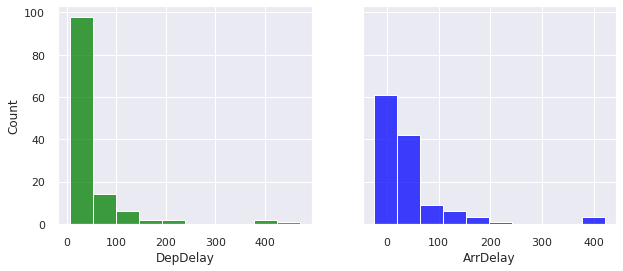

In [71]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_4, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_4, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [72]:
df_cluster_5 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 5]
df_cluster_5.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
34   6962945.0   12.0        17.0        3.0   2325.0      2115.0    721.0   
137  1110257.0    2.0        11.0        1.0   2145.0      2035.0    113.0   
140  3217123.0    6.0        18.0        3.0   2301.0      2225.0    716.0   
206  1245738.0    3.0        24.0        1.0   2011.0      2000.0     52.0   
219   643626.0    2.0        14.0        4.0   1954.0      1900.0    110.0   

     CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
34        539.0       3.045947  0.051626              296.0           324.0   
137        25.0       2.426433  0.051626              148.0           170.0   
140       648.0       7.847186  0.051626              315.0           323.0   
206        55.0      20.030976  0.051626              161.0           175.0   
219        25.0      20.030976  0.103252              196.0           205.0   

     AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
34     271.0     102.0     130.0  1.600413  1.703665    2693.0     4.0   
137    132.0      48.0      70.0  1.548787  2.168301    1107.0     4.0   
140    284.0      28.0      36.0  3.304078  2.271554    2475.0     7.0   
206    147.0      -3.0      11.0  3.097574  1.393908    1235.0     3.0   
219    178.0      45.0      54.0  3.097574  0.929272    1588.0     7.0   

     TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
34      21.0     31.000000      0.000000   0.000000       0.000000   
137     12.0      0.000000      0.000000   0.000000       0.000000   
140     24.0     28.000000      0.000000   0.000000       0.000000   
206     11.0     18.381403      4.008668  15.340426       0.043341   
219     11.0      1.000000      0.000000   0.000000       0.000000   

     LateAircraftDelay         PC 1         PC 2         PC 3         PC 4  \
34           71.000000   444.399255  1763.556776  1435.074937  1254.372227   
137          48.000000  1112.115660   108.394176  1668.417913  1297.939003   
140           0.000000   346.729919  1561.454086  1462.689334  1161.650884   
206          24.799842  1214.842110   243.797572  1651.133099  1207.649405   
219          44.000000  1282.772733   604.492063  1562.692347  1233.910623   

     Kmeans PCA  
34            5  
137           5  
140           5  
206           5  
219           5

In [73]:
df_cluster_5.describe().round(3)

ID   Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count       35.000  35.000      35.000     35.000    35.000      35.000   
mean   3005148.886   5.457      13.829      3.714  2160.457    2107.886   
std    2018287.376   3.459       8.910      1.742   172.359     167.262   
min     222499.000   1.000       1.000      1.000  1634.000    1600.000   
25%    1177997.500   2.500       6.000      2.500  2127.500    2045.000   
50%    2884569.000   5.000      14.000      4.000  2225.000    2135.000   
75%    3934119.500   7.000      20.500      5.000  2279.500    2215.000   
max    6962945.000  12.000      30.000      7.000  2356.000    2325.000   

       ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   35.000      35.000         35.000   35.000             35.000   
mean   250.343     207.114          7.978    0.077            203.029   
std    276.660     275.176          5.971    0.049             83.468   
min      3.000       1.000          2.426    0.052             65.000   
25%     44.000      12.500          3.046    0.052            143.500   
50%    109.000      30.000          6.298    0.052            177.000   
75%    520.500     508.000          8.776    0.103            283.500   
max    808.000     747.000         20.031    0.310            388.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay  Origin    Dest  Distance  \
count          35.000   35.000    35.000    35.000  35.000  35.000    35.000   
mean          208.943  179.457    27.229    33.143   2.555   1.782  1512.457   
std            85.954   83.851    28.697    30.024   1.825   1.117   795.717   
min            71.000   44.000   -20.000     7.000   0.155   0.052   235.000   
25%           149.000  118.500     9.500    13.000   1.239   1.084   933.500   
50%           175.000  149.000    21.000    22.000   2.323   1.704  1194.000   
75%           288.000  261.000    41.000    36.500   3.201   2.272  2218.500   
max           399.000  370.000   102.000   130.000   6.711   4.543  3329.000   

       TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
count  35.000   35.000        35.000        35.000    35.000         35.000   
mean    6.886   16.686        14.085         1.489     9.012          0.016   
std     4.289    5.427        11.071         1.965     8.233          0.021   
min     3.000    8.000         0.000         0.000     0.000          0.000   
25%     4.000   13.500         1.500         0.000     0.000          0.000   
50%     6.000   16.000        18.381         0.000    14.000          0.000   
75%     9.000   20.000        18.381         4.009    15.340          0.043   
max    21.000   33.000        43.000         4.009    28.000          0.043   

       LateAircraftDelay      PC 1      PC 2      PC 3      PC 4  Kmeans PCA  
count             35.000    35.000    35.000    35.000    35.000        35.0  
mean              25.126   916.614   538.034  1633.259  1239.925         5.0  
std               20.940   373.243   833.957   139.572    91.244         0.0  
min                0.000   173.281  -780.567  1405.808  1093.906         5.0  
25%               13.000   544.213   -75.085  1490.920  1167.976         5.0  
50%               24.800  1025.256   192.367  1649.961  1234.813         5.0  
75%               26.900  1124.167  1293.779  1748.616  1307.237         5.0  
max               91.000  1640.172  2434.696  1847.660  1389.604         5.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

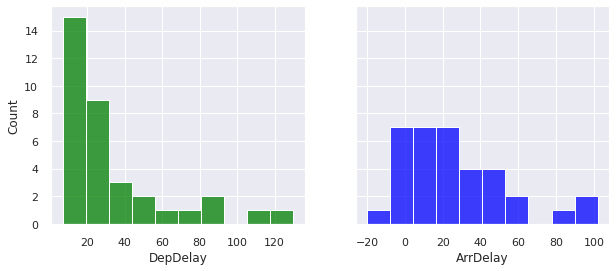

In [74]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_5, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_5, x="ArrDelay",color="blue", ax=ax2, bins=10);

In [75]:
df_cluster_6 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 6]
df_cluster_6.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
4   5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   
23  4168982.0    7.0        10.0        4.0   1146.0      1135.0   2016.0   
33  6421333.0   11.0        21.0        5.0   1807.0      1759.0   2142.0   
45  5632059.0   10.0        12.0        7.0   1752.0      1745.0   2133.0   
46  2397628.0    5.0         6.0        2.0   1341.0      1335.0   1857.0   

    CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
4       2029.0       7.847186  0.051626              296.0           299.0   
23      2006.0       3.045947  0.051626              330.0           331.0   
33      2139.0       3.045947  0.051626              395.0           400.0   
45      2143.0       4.388229  0.051626              221.0           238.0   
46      1855.0      20.030976  0.309757              196.0           200.0   

    AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  \
4     280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0   
23    301.0      10.0      11.0  0.671141  2.271554    2465.0     8.0   
33    350.0       3.0       8.0  1.393908  0.671141    2465.0     2.0   
45    202.0     -10.0       7.0  1.445534  0.258131    1576.0     3.0   
46    179.0       2.0       6.0  0.413010  1.084151    1497.0     5.0   

    TaxiOut  CarrierDelay  WeatherDelay   NASDelay  SecurityDelay  \
4      10.0      0.000000      0.000000   0.000000       0.000000   
23     21.0     18.381403      4.008668  15.340426       0.043341   
33     43.0     18.381403      4.008668  15.340426       0.043341   
45     16.0     18.381403      4.008668  15.340426       0.043341   
46     12.0     18.381403      4.008668  15.340426       0.043341   

    LateAircraftDelay        PC 1         PC 2        PC 3        PC 4  \
4          173.000000 -420.034300  1704.779232 -524.782081  -44.643981   
23          24.799842  -10.776522  1814.975104 -490.778856 -268.400637   
33          24.799842 -748.521990  1803.308366  -24.089018   43.590154   
45          24.799842 -742.141034   884.699475 -110.939429  -57.448709   
46          24.799842  -62.583086   792.782565 -267.919824 -148.178453   

    Kmeans PCA  
4            6  
23           6  
33           6  
45           6  
46           6

In [76]:
df_cluster_6.describe().round(3)

ID    Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
count      170.000  170.000     170.000    170.000   170.000     170.000   
mean   3488042.918    6.241      17.065      3.994  1670.382    1608.594   
std    1992085.554    3.350       8.556      1.825   231.590     245.044   
min      23227.000    1.000       1.000      1.000  1146.000     855.000   
25%    1767474.500    3.000      10.000      2.250  1508.250    1430.000   
50%    3306555.500    6.000      17.000      4.000  1701.500    1637.500   
75%    4987077.500    8.750      24.000      5.000  1831.500    1755.000   
max    6998338.000   12.000      31.000      7.000  2145.000    2130.000   

        ArrTime  CRSArrTime  UniqueCarrier  TailNum  ActualElapsedTime  \
count   170.000     170.000        170.000  170.000            170.000   
mean   2072.241    2016.047          7.819    0.069            253.388   
std     174.707     182.668          5.481    0.033             56.377   
min    1651.000    1403.000          0.052    0.052            143.000   
25%    1940.500    1904.750          4.388    0.052            213.000   
50%    2081.000    2030.000          6.298    0.052            239.000   
75%    2213.000    2145.750          8.776    0.103            295.750   
max    2355.000    2346.000         20.031    0.310            441.000   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay   Origin     Dest  \
count         170.000  170.000   170.000   170.000  170.000  170.000   
mean          256.865  225.665    33.371    36.847    2.423    2.134   
std            54.166   52.180    53.546    52.325    1.793    1.178   
min           155.000  125.000   -23.000     6.000    0.052    0.052   
25%           217.250  185.750     8.000    14.000    1.291    1.136   
50%           241.500  215.000    23.000    21.500    1.755    2.272   
75%           299.750  267.500    47.000    45.000    3.098    2.788   
max           400.000  350.000   569.000   571.000    6.711    5.266   

       Distance   TaxiIn  TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
count   170.000  170.000  170.000       170.000       170.000   170.000   
mean   1764.071    6.788   20.935        17.833         3.080    14.683   
std     426.066    3.355   14.607        47.944         7.677    18.540   
min    1069.000    2.000    6.000         0.000         0.000     0.000   
25%    1423.750    5.000   12.000         0.000         0.000     0.000   
50%    1635.000    6.000   16.500        16.500         0.000    15.340   
75%    2149.500    8.000   25.000        18.381         4.009    15.340   
max    2640.000   27.000  120.000       569.000        52.000   100.000   

       SecurityDelay  LateAircraftDelay      PC 1      PC 2     PC 3     PC 4  \
count        170.000            170.000   170.000   170.000  170.000  170.000   
mean           0.033             19.856  -536.511  1071.173 -148.355  -14.979   
std            0.230             21.681   349.758   438.423  178.795  124.959   
min            0.000              0.000 -1305.854   361.981 -650.504 -268.401   
25%            0.000              0.000  -784.532   730.133 -293.939 -116.878   
50%            0.000             24.800  -556.908   943.098 -112.476   -3.277   
75%            0.043             24.800  -239.045  1461.511   10.525   82.144   
max            3.000            173.000    86.099  1989.761  152.017  427.025   

       Kmeans PCA  
count       170.0  
mean          6.0  
std           0.0  
min           6.0  
25%           6.0  
50%           6.0  
75%           6.0  
max           6.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

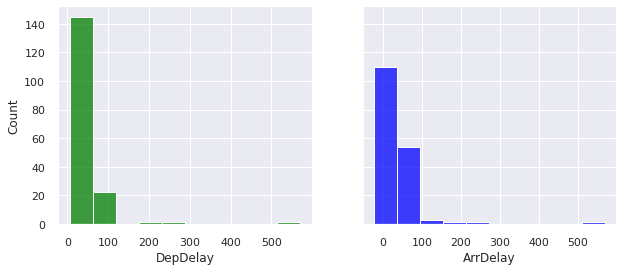

In [77]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_6, x="DepDelay",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_6, x="ArrDelay",color="blue", ax=ax2, bins=10);

## SilhouetteVisualizer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

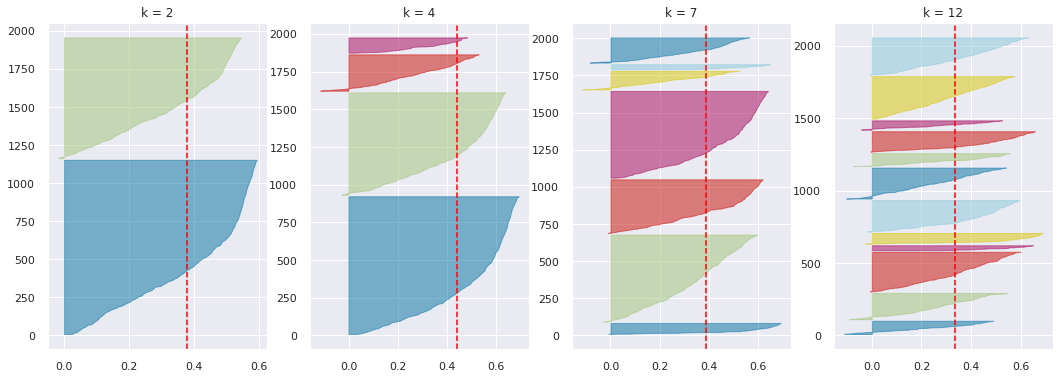

In [78]:
# SilhouetteVisualizer
# ==============================================================================

fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(18,6),nrows=1,ncols=4)

#ax1
visualizer = SilhouetteVisualizer(KMeans(n_clusters=2, random_state=6858), colors='yellowbrick',ax=ax1)
visualizer.fit(PCA_components)       # Fit the data to the visualizer
ax1.set_title('k = 2')               # Title

#ax2
visualizer2 = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=6858), colors='yellowbrick',ax=ax2)
visualizer2.fit(PCA_components)      # Fit the data to the visualizer
ax2.set_title('k = 4')               # Title

#ax3
visualizer3 = SilhouetteVisualizer(KMeans(n_clusters=7, random_state=6858), colors='yellowbrick',ax=ax3)
visualizer3.fit(PCA_components)       # Fit the data to the visualizer
ax3.set_title('k = 7');               # Title

#ax4
visualizer4 = SilhouetteVisualizer(KMeans(n_clusters=12, random_state=6858), colors='yellowbrick',ax=ax4)
visualizer4.fit(PCA_components)       # Fit the data to the visualizer
ax4.set_title('k = 12');              # Title        

In [79]:
sil0 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 2, n_init = 12, random_state=6858).fit(PCA_components)).labels_)
sil1 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=6858).fit(PCA_components)).labels_)
sil2 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 7, n_init = 12, random_state=6858).fit(PCA_components)).labels_)
sil3 = silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 12, n_init = 12, random_state=6858).fit(PCA_components)).labels_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
silhouette = pd.DataFrame({'Meassure': ['2 Clusters' ,'4 Clusters', '7 Clusters', '12 Clusters'],
                            'Scores': [sil0,sil1,sil2,sil3]
                            })

<IPython.core.display.Javascript object>

## Silhouette Score

In [81]:
silhouette

Meassure    Scores
0   2 Clusters  0.376851
1   4 Clusters  0.439522
2   7 Clusters  0.390469
3  12 Clusters  0.335428

# Hierarchy

In [82]:
import scipy.cluster.hierarchy as sch

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

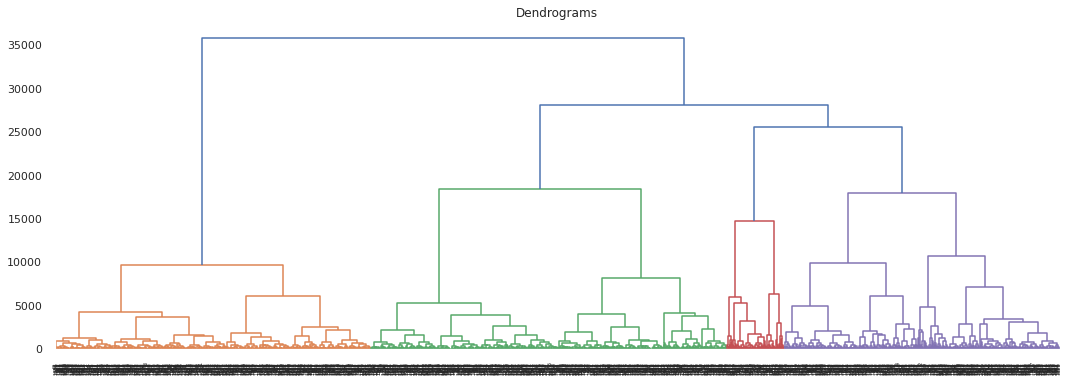

In [83]:
plt.figure(figsize=(18, 6)) 
plt.title("Dendrograms")  
dendrogram = sch.dendrogram(sch.linkage(PCA_components, method='ward'))
plt.axhline(y= 60000, color='r', linestyle='--');

### Agglomerative hierarchical clustering

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

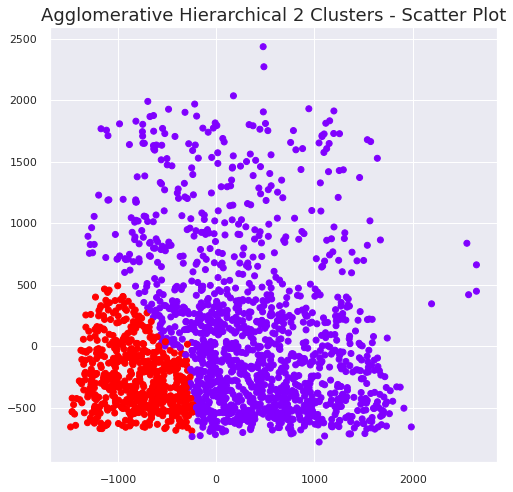

In [84]:
# Create the clusters using Agglomerative hierarchical clustering
agc = AgglomerativeClustering(n_clusters= 2, affinity='euclidean', linkage='ward')
plt.figure(figsize =(8, 8))
plt.scatter(PCA_components['PC 1'], PCA_components['PC 2'], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 2 Clusters - Scatter Plot", fontsize=18)
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

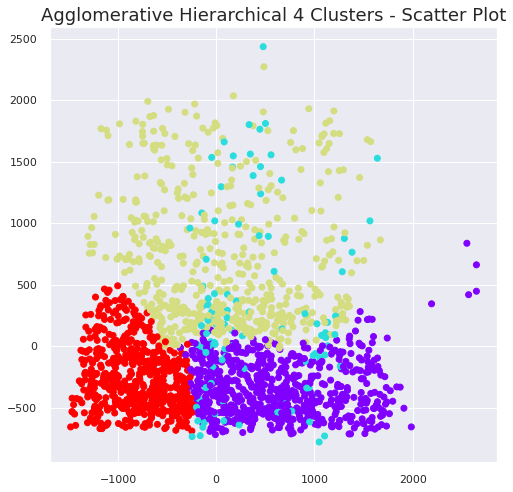

In [85]:
# Create the clusters using Agglomerative hierarchical clustering
agc = AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='ward')
plt.figure(figsize =(8, 8))
plt.scatter(PCA_components['PC 1'], PCA_components['PC 2'], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 4 Clusters - Scatter Plot", fontsize=18)
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

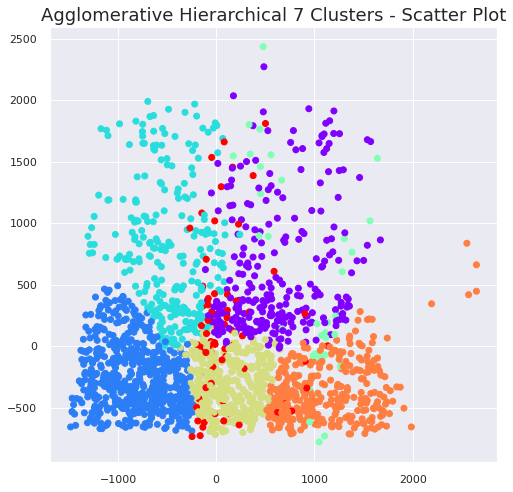

In [86]:
# Create the clusters using Agglomerative hierarchical clustering
agc = AgglomerativeClustering(n_clusters= 7, affinity='euclidean', linkage='ward')
plt.figure(figsize =(8, 8))
plt.scatter(PCA_components['PC 1'], PCA_components['PC 2'], c = agc.fit_predict(PCA_components), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 7 Clusters - Scatter Plot", fontsize=18)
plt.show()  


In [87]:
agc.fit(PCA_components)

AgglomerativeClustering(n_clusters=7)

In [88]:
labels_hier = agc.labels_
labels_hier[:20]

array([4, 1, 0, 1, 2, 4, 1, 0, 1, 4, 1, 4, 1, 2, 4, 4, 0, 5, 0, 5])

In [89]:
df_hier_pca = agc.fit(PCA_components)

In [90]:
clusters_all_pca = pd.concat([df_pca_kmeans, pd.DataFrame({'PCA Clusters Hier':labels_hier})], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
clusters_all_pca.head()

ID  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   101064.0    1.0         1.0        2.0   1402.0      1230.0   1417.0   
1  1507815.0    3.0        20.0        4.0   1723.0      1715.0   1932.0   
2  2980060.0    5.0         5.0        1.0    703.0       650.0   1031.0   
3  6158470.0   11.0         8.0        6.0   1628.0      1559.0   1731.0   
4  5039080.0    9.0        26.0        5.0   1526.0      1230.0   2322.0   

   CRSArrTime  UniqueCarrier   TailNum  ActualElapsedTime  CRSElapsedTime  \
0      1256.0       4.801239  0.051626               75.0            86.0   
1      1906.0       4.130098  0.051626              129.0           111.0   
2      1011.0       6.298400  0.051626              328.0           321.0   
3      1715.0       7.847186  0.051626               63.0            76.0   
4      2029.0       7.847186  0.051626              296.0           299.0   

   AirTime  ArrDelay  DepDelay    Origin      Dest  Distance  TaxiIn  TaxiOut  \
0     56.0      81.0      92.0  2.374806  2.787816     370.0     6.0     13.0   
1    100.0      26.0       8.0  0.103252  5.265875     317.0    12.0     17.0   
2    302.0      20.0      13.0  1.393908  1.910170    2105.0     8.0     18.0   
3     42.0      16.0      29.0  3.097574  2.787816     236.0     7.0     14.0   
4    280.0     173.0     176.0  0.154879  2.684564    2367.0     6.0     10.0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           0.0           0.0       0.0            0.0               81.0   
1           8.0           0.0      18.0            0.0                0.0   
2           0.0           0.0      20.0            0.0                0.0   
3           0.0           0.0       0.0            0.0               16.0   
4           0.0           0.0       0.0            0.0              173.0   

          PC 1         PC 2        PC 3        PC 4  Kmeans PCA  \
0   466.419289  -415.399646  -39.356893  134.649349           1   
1  -523.522600  -404.861482  -74.536857  -33.841121           3   
2  1459.539018  1370.667238 -181.584072  -24.282052           4   
3  -202.848225  -518.079918  -40.025446  -10.710267           1   
4  -420.034300  1704.779232 -524.782081  -44.643981           6   

   PCA Clusters Hier  
0                  4  
1                  1  
2                  0  
3                  1  
4                  2

### Visualize Cluster Distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

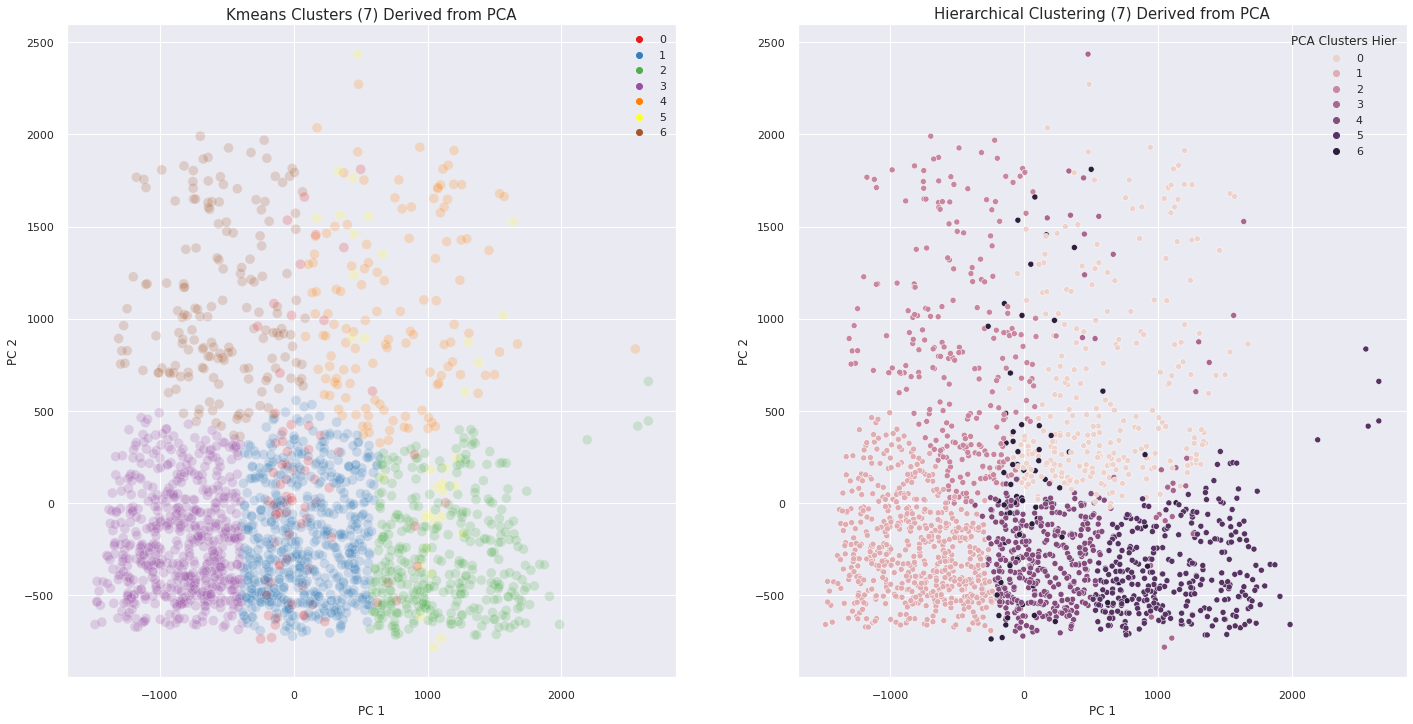

In [92]:
# Scatter plot using the first 2 Principal Components to observe the Cluster Distribution

plt.figure(figsize=(24,12))

plt.subplot(1,2,1)
sns.scatterplot(x= 'PC 1', y='PC 2',
                data= clusters_all_pca,
                hue = labels_pca, palette='Set1', s= 100,
                alpha= 0.2).set_title('Kmeans Clusters (7) Derived from PCA',
                fontsize= 15)



plt.subplot(1,2,2)
sns.scatterplot(x= 'PC 1', y='PC 2',
                data= clusters_all_pca, 
                hue= 'PCA Clusters Hier').set_title('Hierarchical Clustering (7) Derived from PCA',
                fontsize=15);